In [1]:
%load_ext autoreload
%autoreload 2

### Dedicated notebook for the timegraph idea

- create a time based graph with 2 timesteps
- Visualize it
- Analyze it with subgraph isomorphism

In [2]:
from graph_creator.ActorTimeGraph import ActorTimeGraph

import pandas as pd
pd.set_option('display.max_colwidth', None)

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import distance
import xml.etree.ElementTree as ET
from shapely.geometry import Polygon, LineString
import pandas as pd
#from src.generate_traffic_data import clean_carla, spawn_scene, run_scene
import carla
import os
os.getcwd()
from datetime import datetime
import time
import random
from tqdm import tqdm
import networkx as nx
import numpy as np
import pickle

os.chdir('../..')
os.getcwd()


from graph_creator.MapGraph import MapGraph
from graph_creator.ActorGraph import ActorGraph
from graph_creator.utilities import make_node_edge_df , check_offroad_actors

from graph_creator.plot_graphs import plot_lane_map_advanced, add_actors_to_map, add_actor_edges_to_map

In [3]:
files = os.listdir("/home/tmuehlen/repos/graph_coverage/carla/data")

In [4]:
# [file.split("scene_")[1].split("_tracks")[0] for file in files if "tracks.parquet" in file]


In [5]:
# scn_ids = [file.split("_")[1] for file in files if "tracks.parquet" in file]
scn_ids = [file.split("scene_")[1].split("_tracks")[0] for file in files if "tracks.parquet" in file]

scn_ids = sorted(scn_ids)
# the following filter includes a lot of scenarios which have offroad actors.
#scn_ids = [scn_id for scn_id in scn_ids if scn_id > "2025-09-05"]
# print(len(scn_ids))
# scn_id = scn_ids[200]
# the following filter is only using updated scenario gen, which hopefully has nearly no offroad actors.
#scn_ids = [scn_id for scn_id in scn_ids if scn_id > "2025-10-02 22:49"]
print(len(scn_ids))


152


In [6]:
scn_ids = [scn_id for scn_id in scn_ids if ("Town01" in scn_id)]


In [7]:
scn_ids

['2025-10-05 20:53:06.306761_Town01',
 '2025-10-05 20:53:41.635057_Town01',
 '2025-10-05 20:54:34.330511_Town01',
 '2025-10-05 20:55:06.056957_Town01',
 '2025-10-05 20:55:55.532439_Town01',
 '2025-10-05 20:56:40.894877_Town01_Opt',
 '2025-10-05 20:57:17.716974_Town01_Opt',
 '2025-10-05 20:57:58.492657_Town01_Opt',
 '2025-10-05 20:58:31.154340_Town01_Opt',
 '2025-10-05 20:58:55.244183_Town01_Opt',
 '2025-10-05 21:39:28.602708_Town01',
 '2025-10-05 21:39:53.397926_Town01',
 '2025-10-05 21:40:34.713974_Town01',
 '2025-10-05 21:41:08.401489_Town01',
 '2025-10-05 21:41:39.049595_Town01',
 '2025-10-06 22:37:47.512375_Town01',
 '2025-10-06 22:38:48.546204_Town01',
 '2025-10-06 22:51:37.935590_Town01',
 '2025-10-06 22:52:16.349648_Town01',
 '2025-10-06 22:53:05.145013_Town01',
 '2025-10-07 20:53:46.815425_Town01',
 '2025-10-07 20:54:11.798263_Town01',
 '2025-10-07 20:55:00.882772_Town01',
 '2025-10-07 21:40:53.291456_Town01',
 '2025-10-07 21:41:16.068828_Town01',
 '2025-10-07 21:46:35.249821_T

count    390.000000
mean       0.001095
std        0.012877
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.185702
Name: distance, dtype: float64


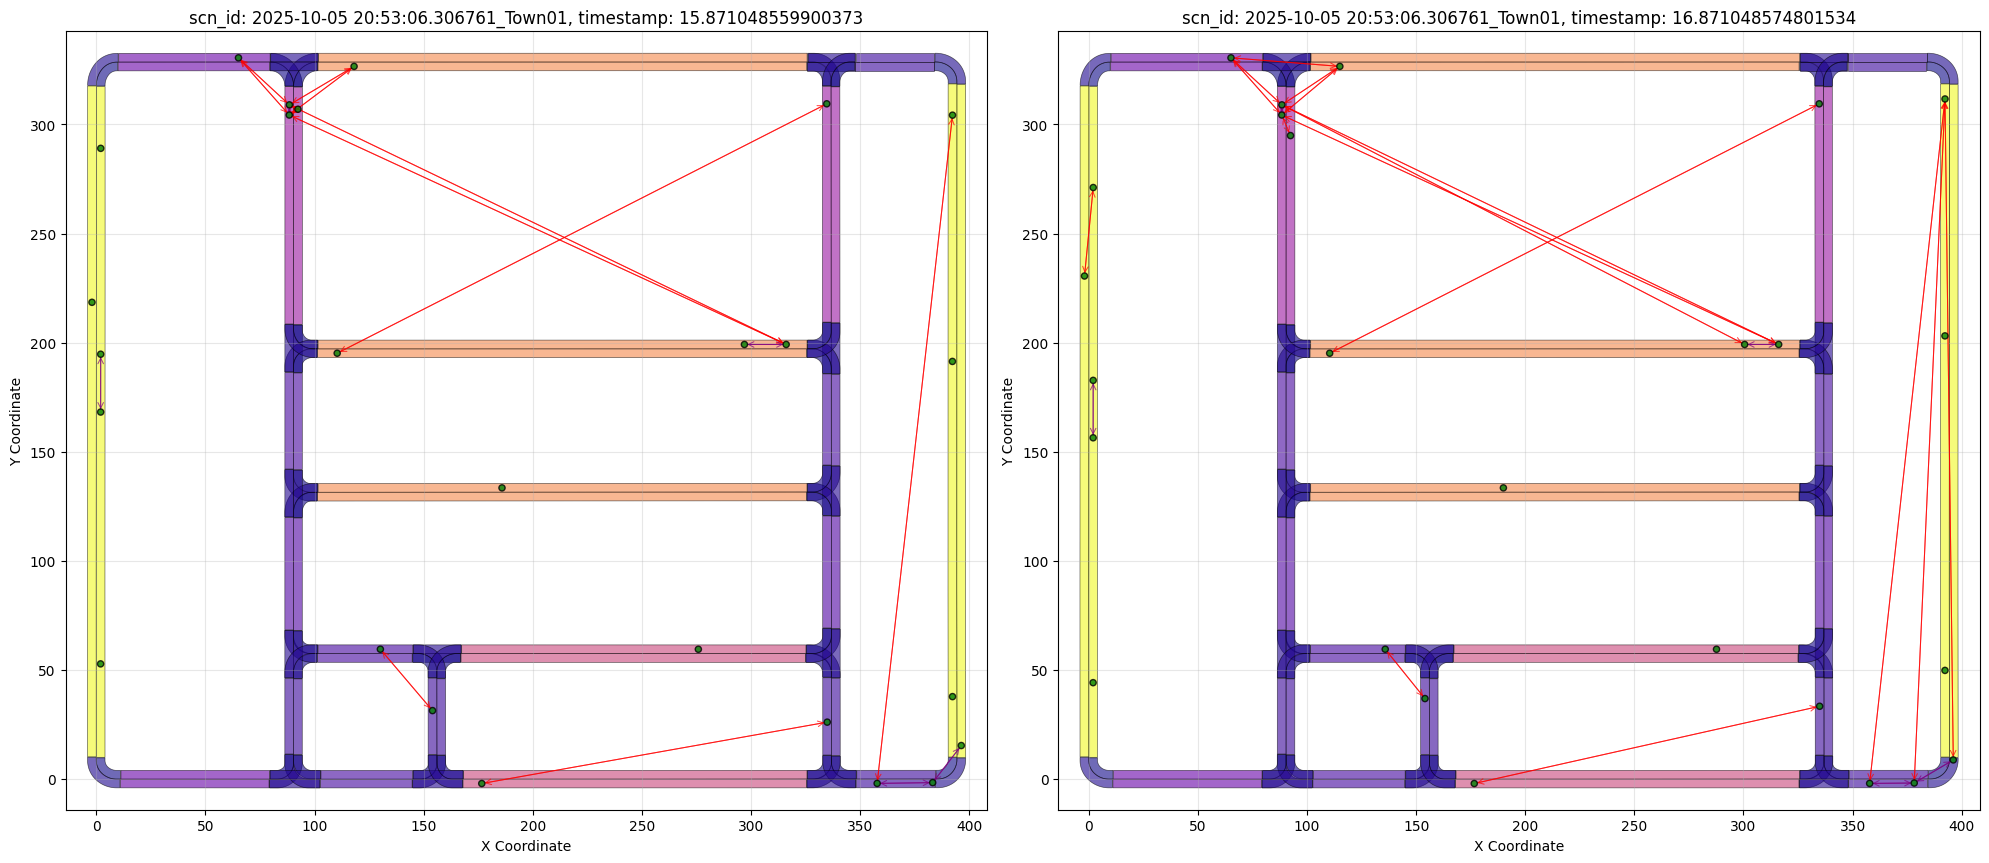

count    765.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


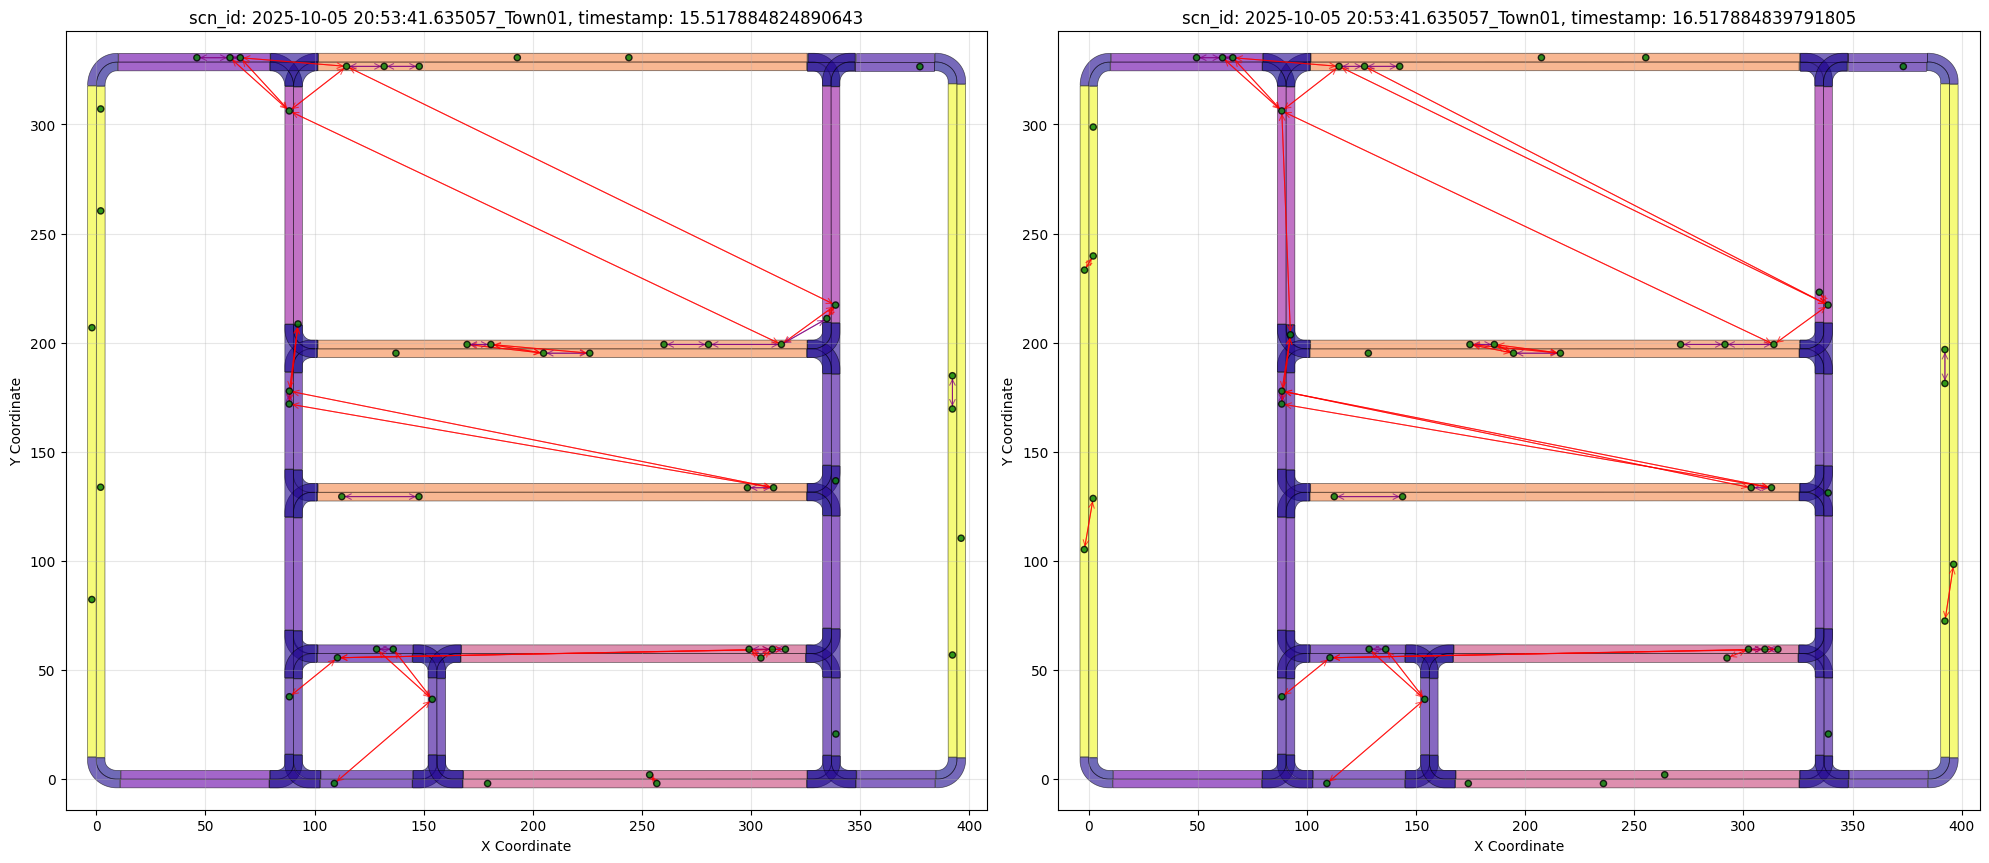

count    375.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


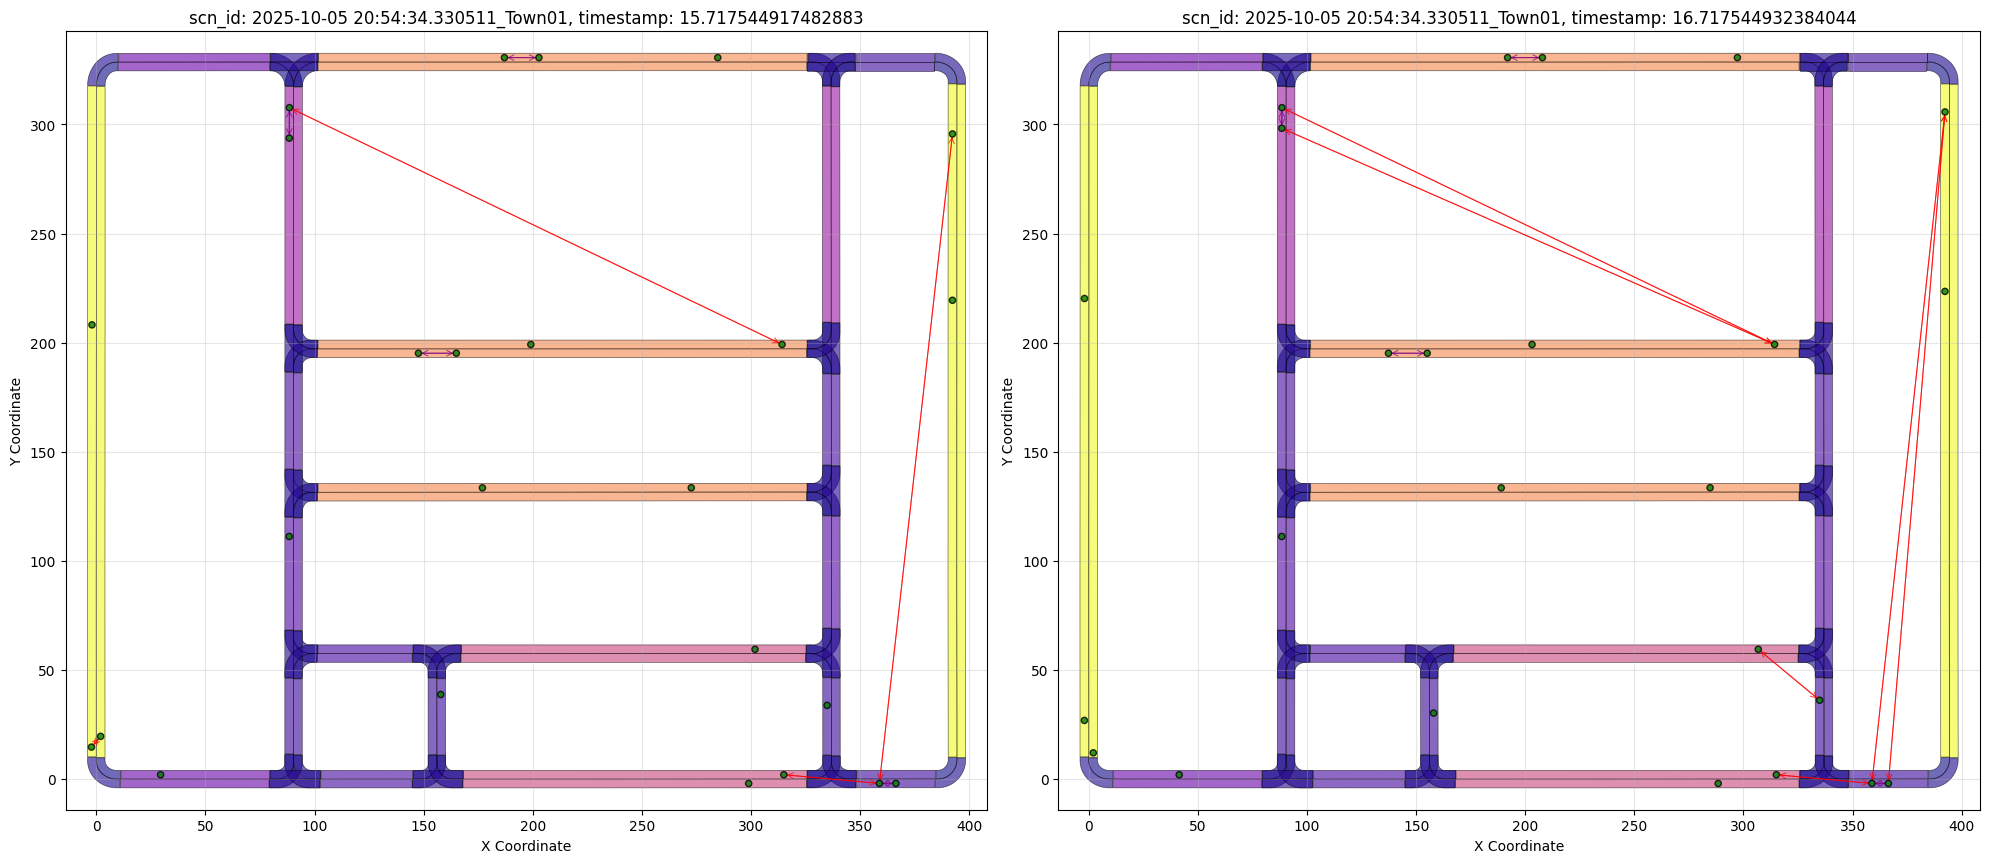

count    720.000000
mean       0.000256
std        0.006745
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.180958
Name: distance, dtype: float64


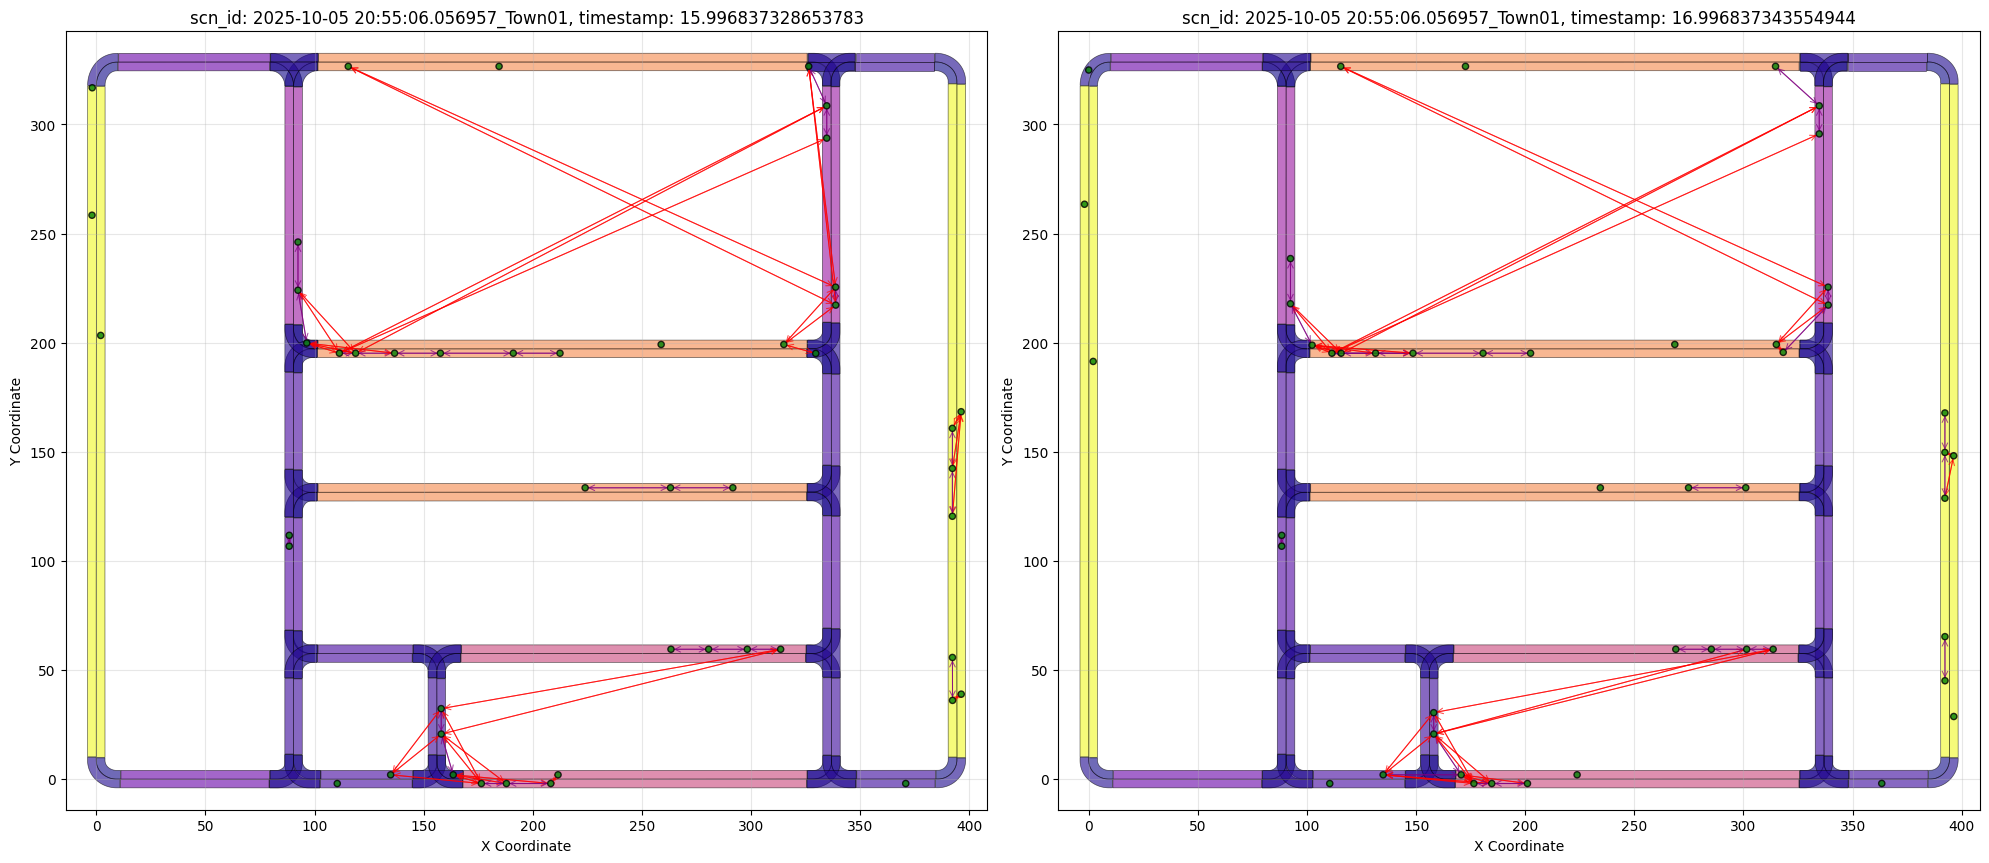

count    660.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


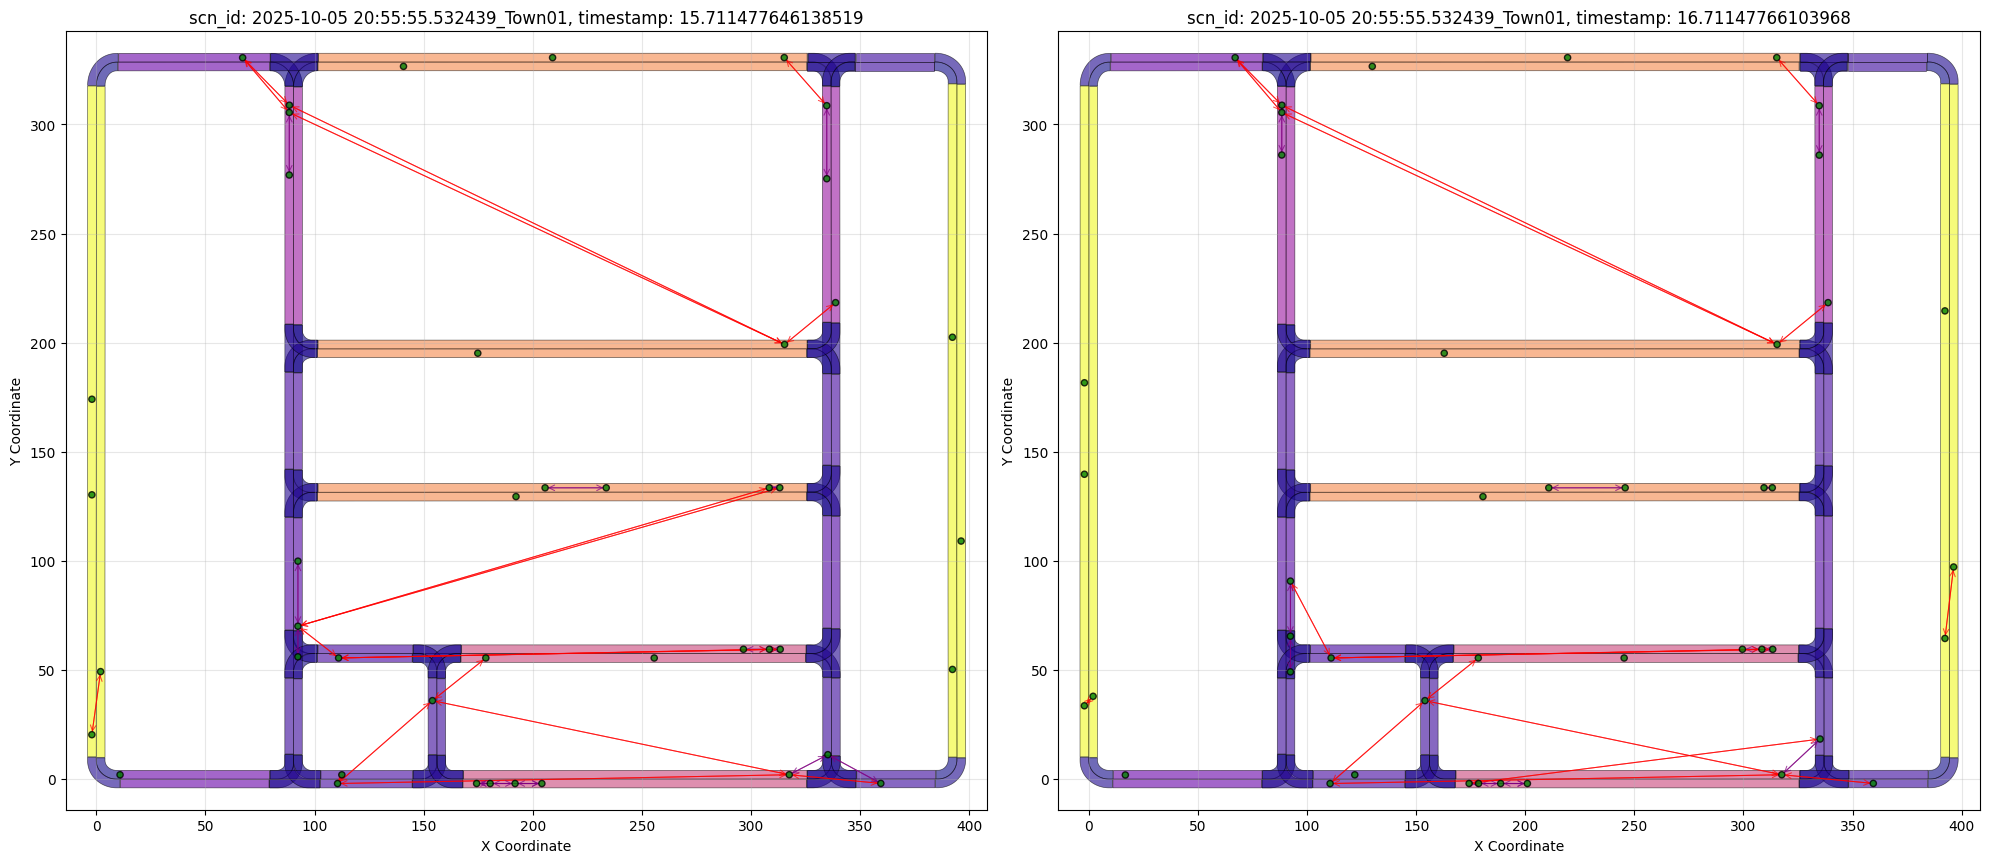

count    465.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


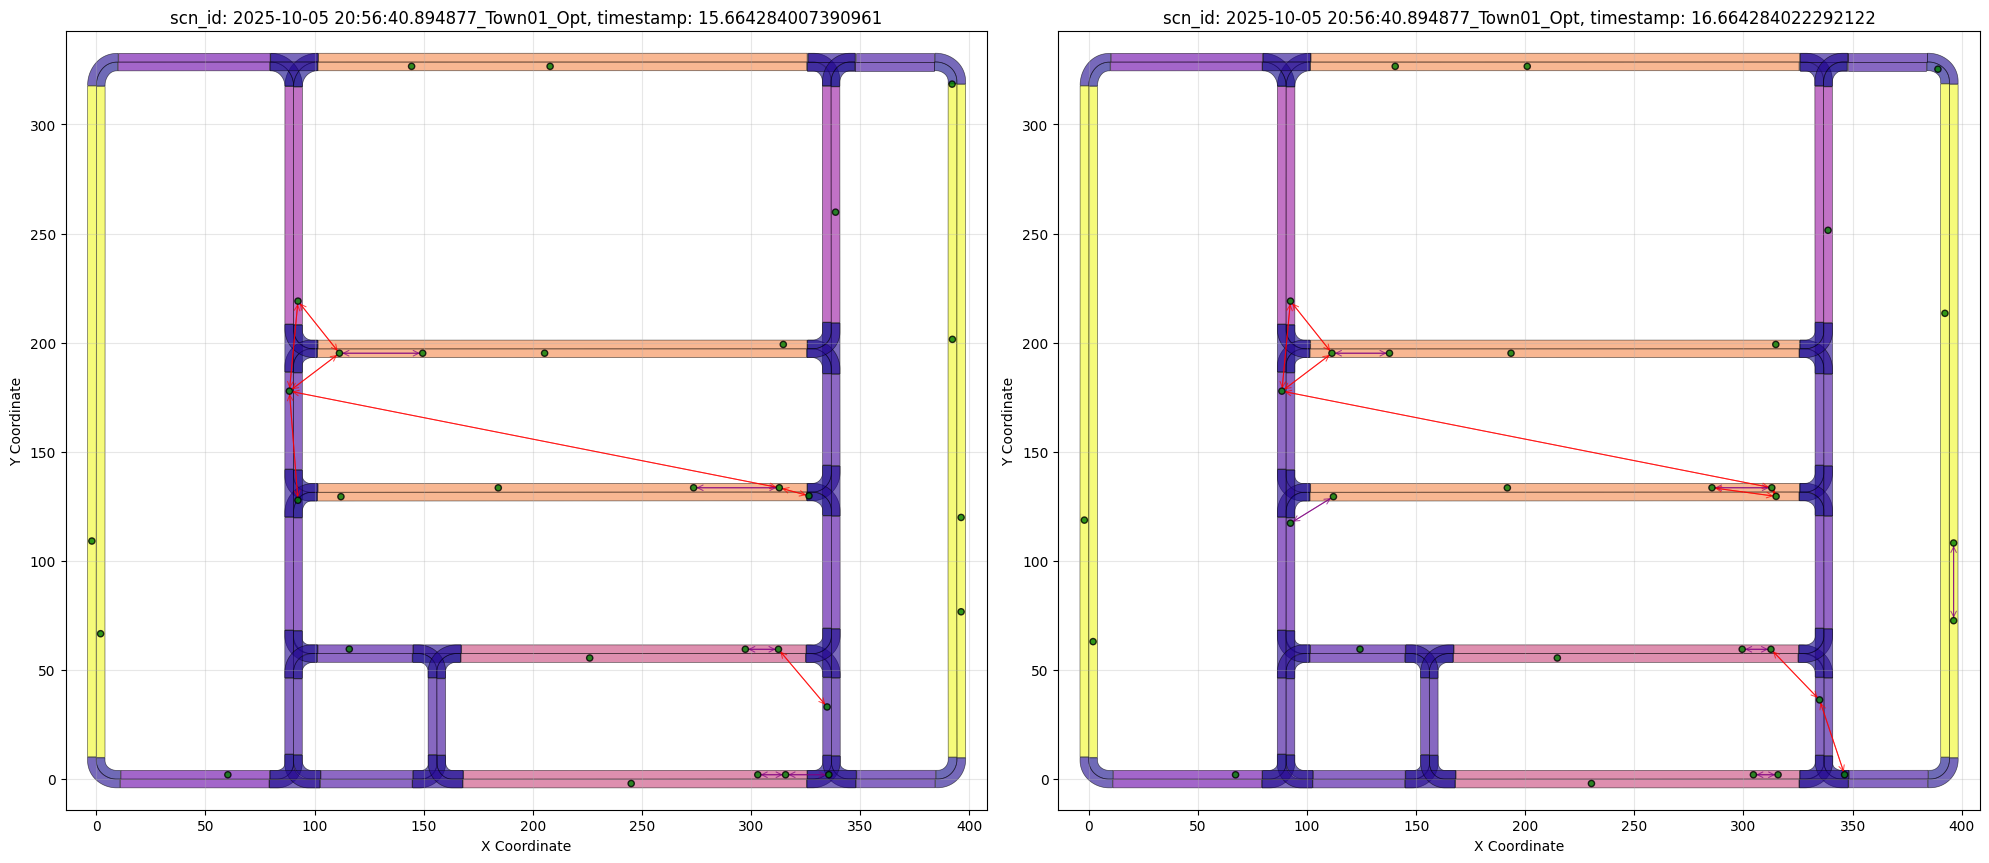

count    585.000000
mean       0.000248
std        0.004308
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.085175
Name: distance, dtype: float64


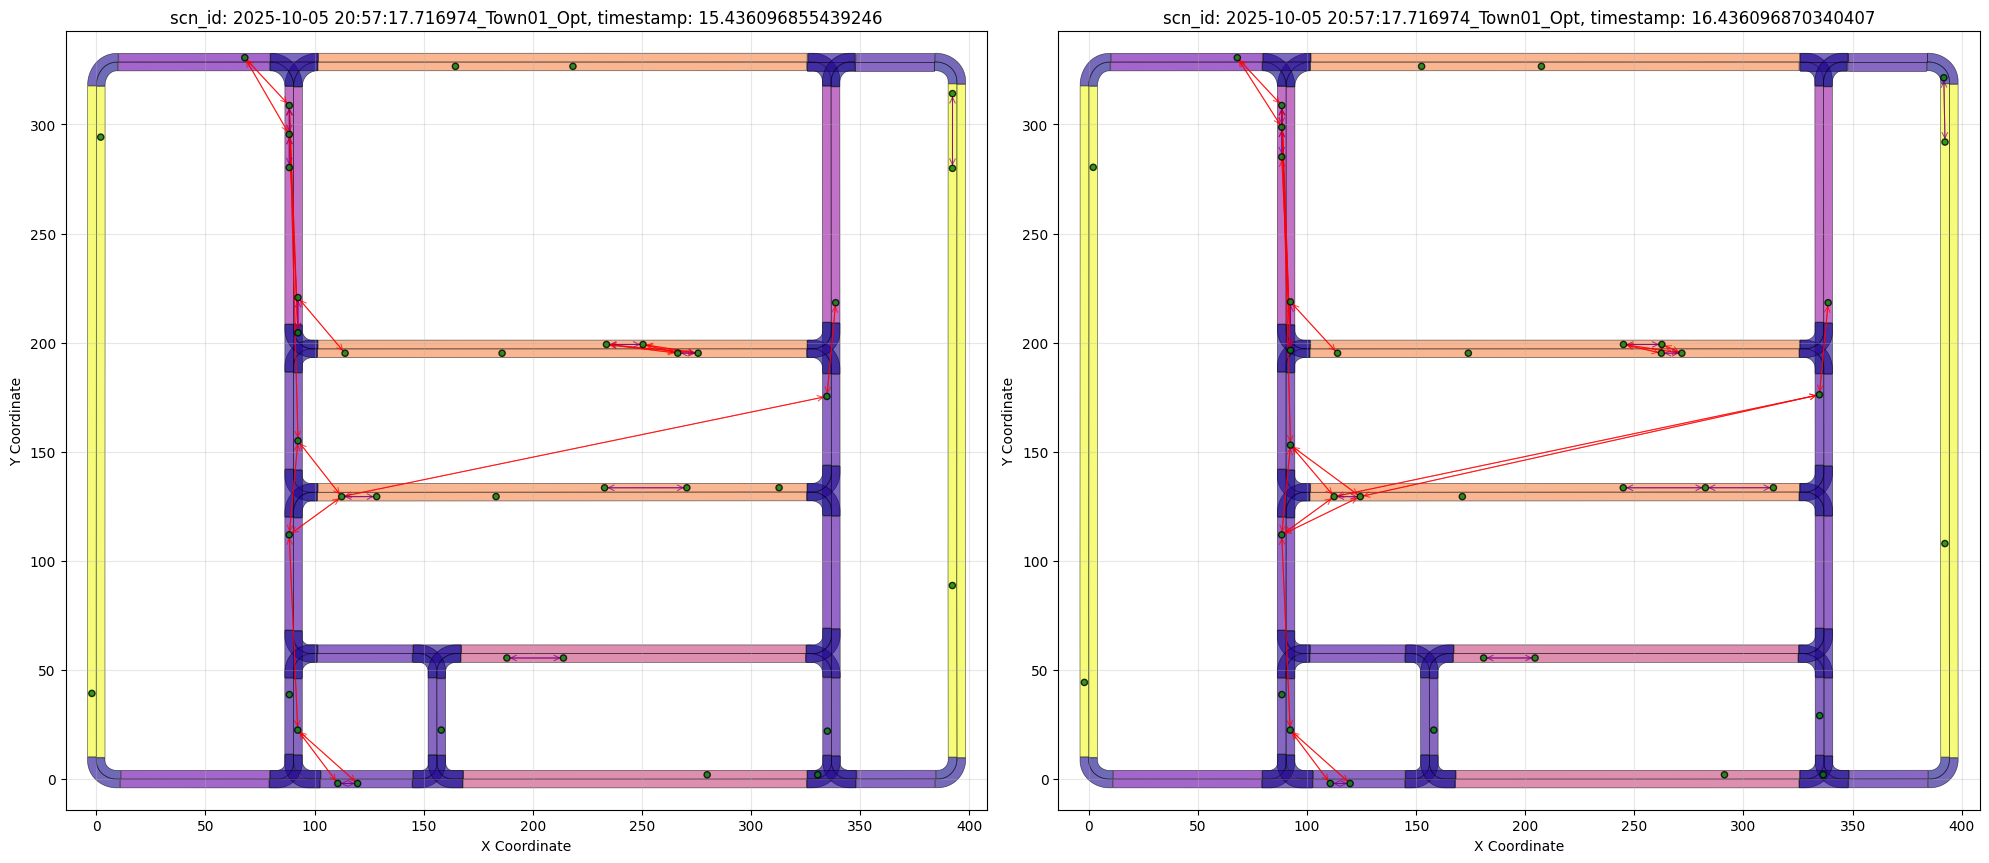

count    405.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


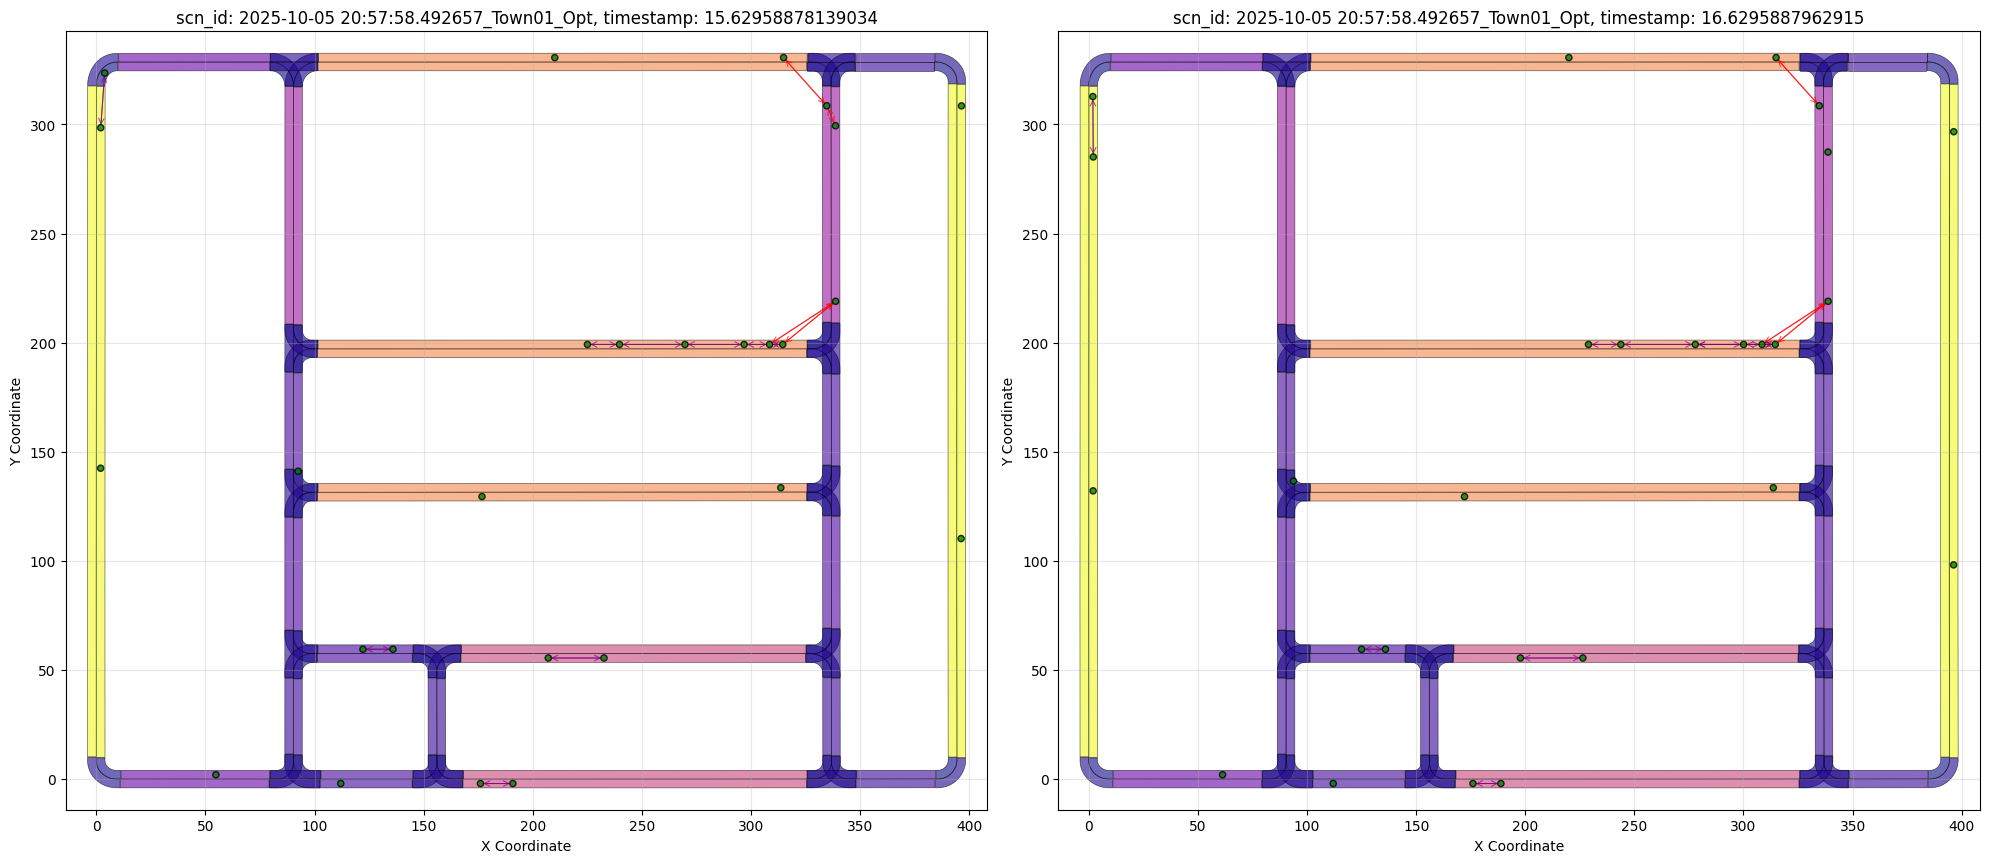

count    240.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


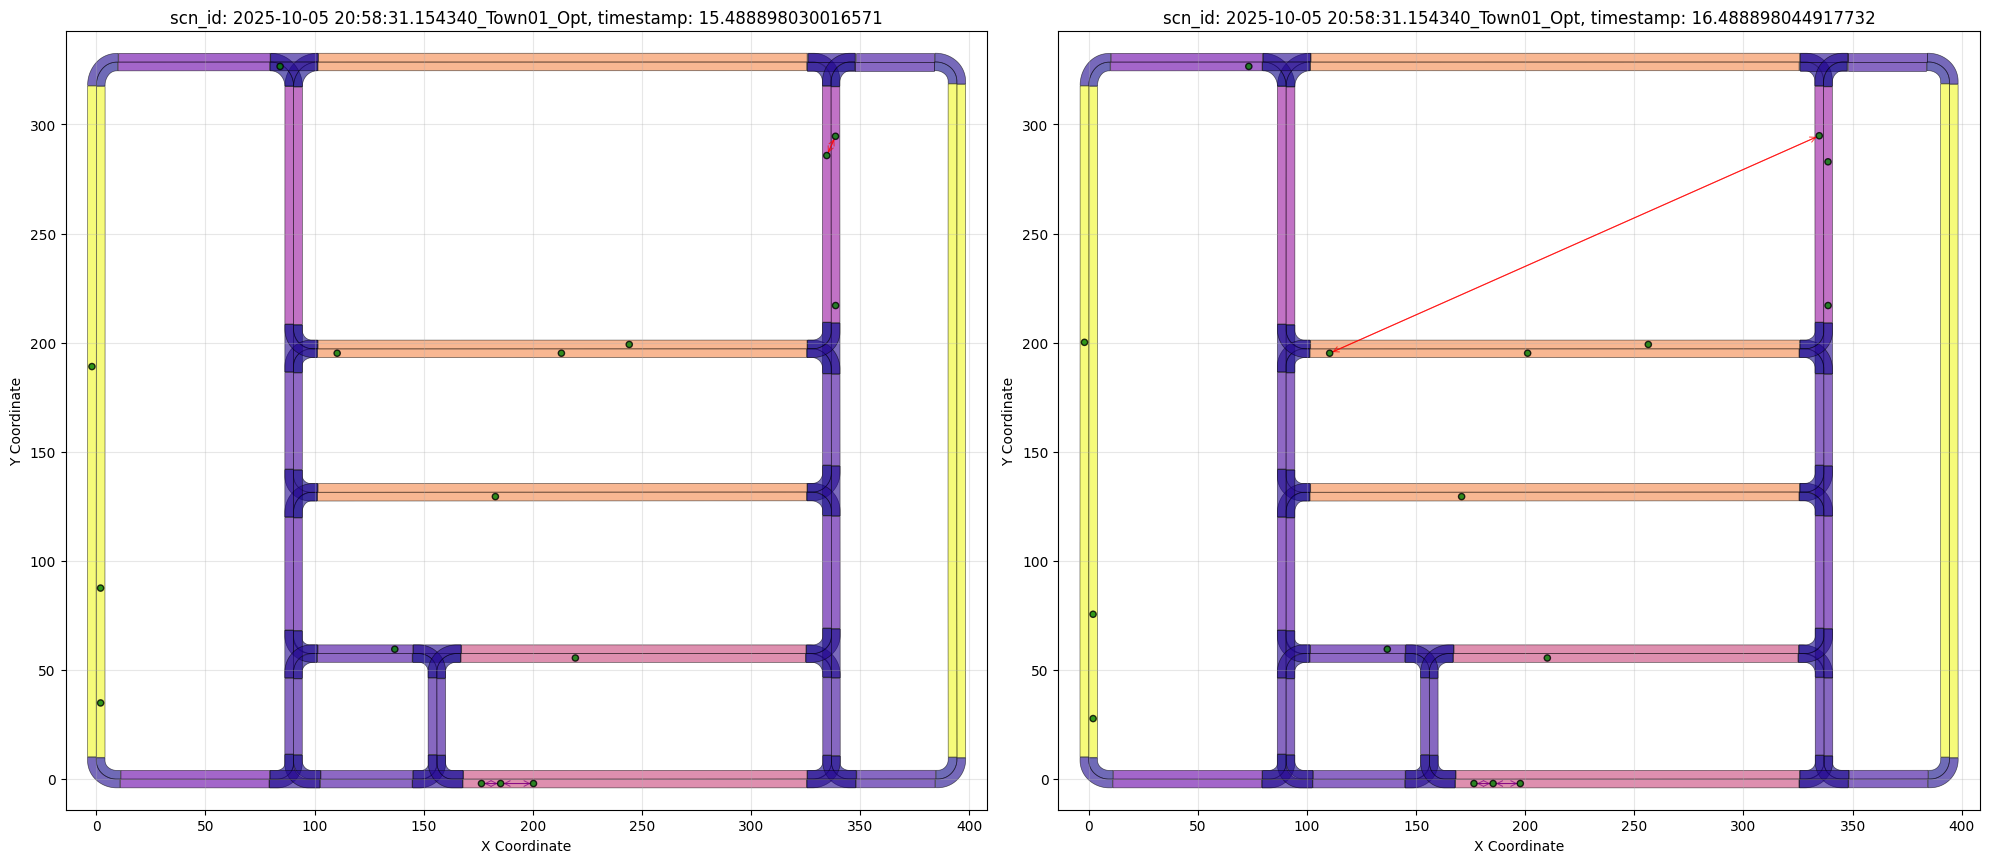

count    255.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


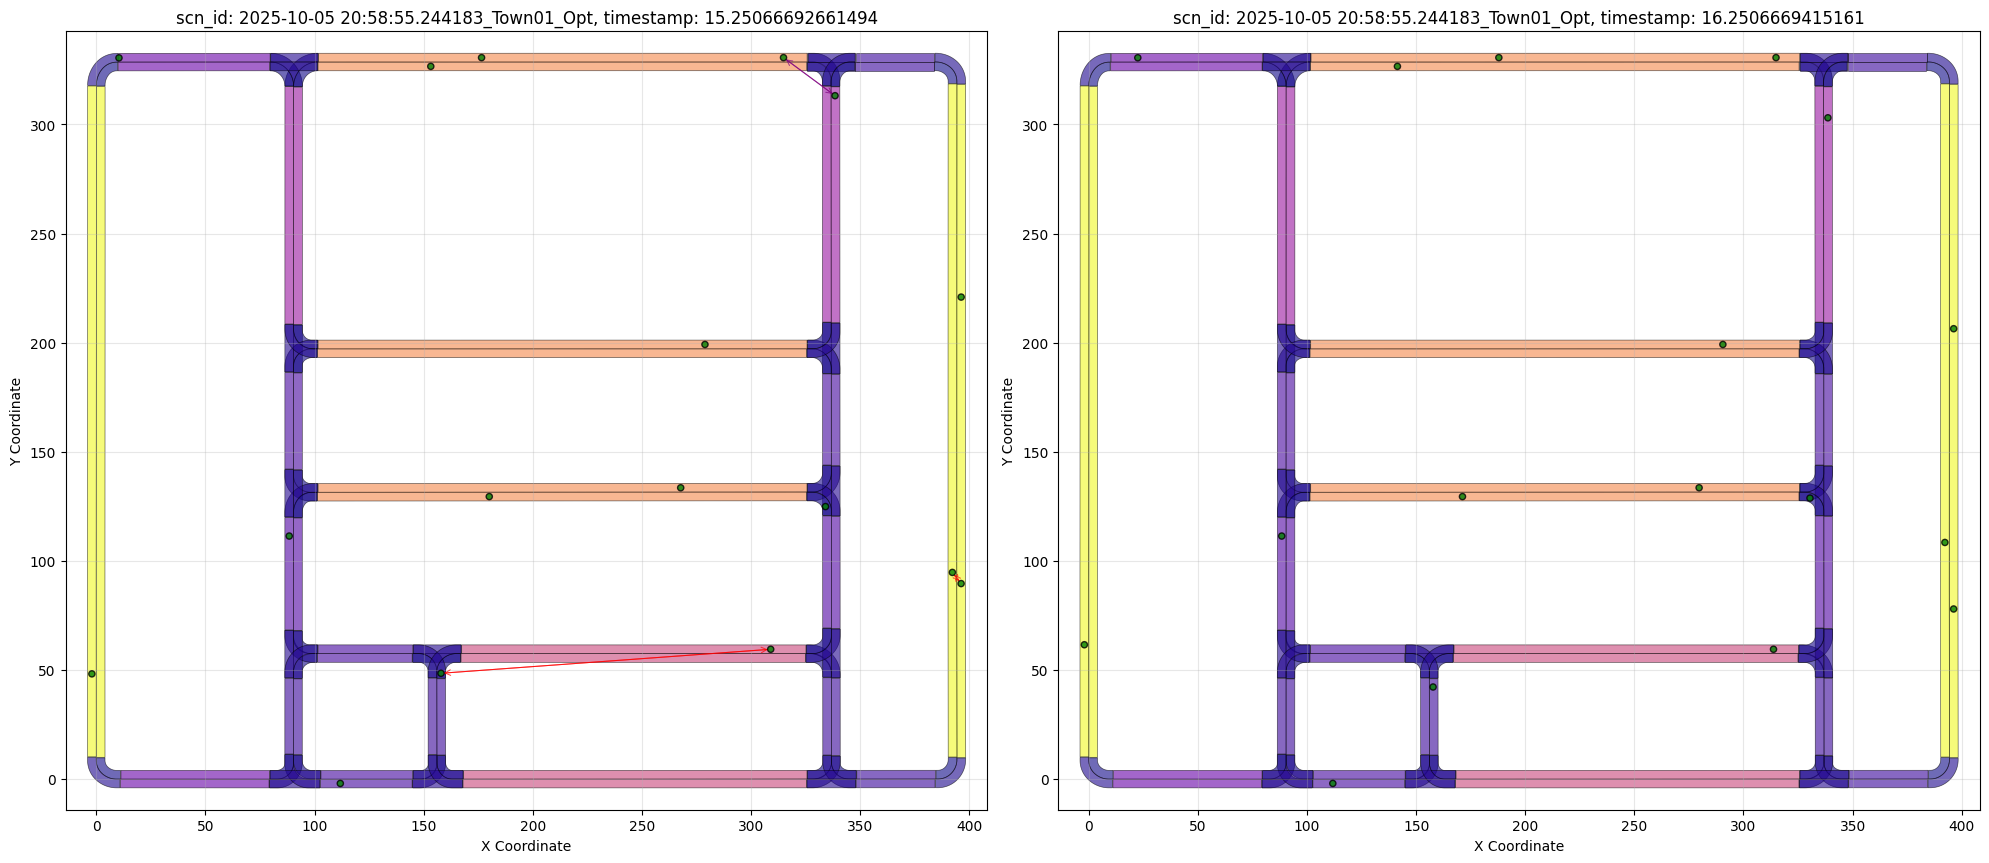

count    165.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


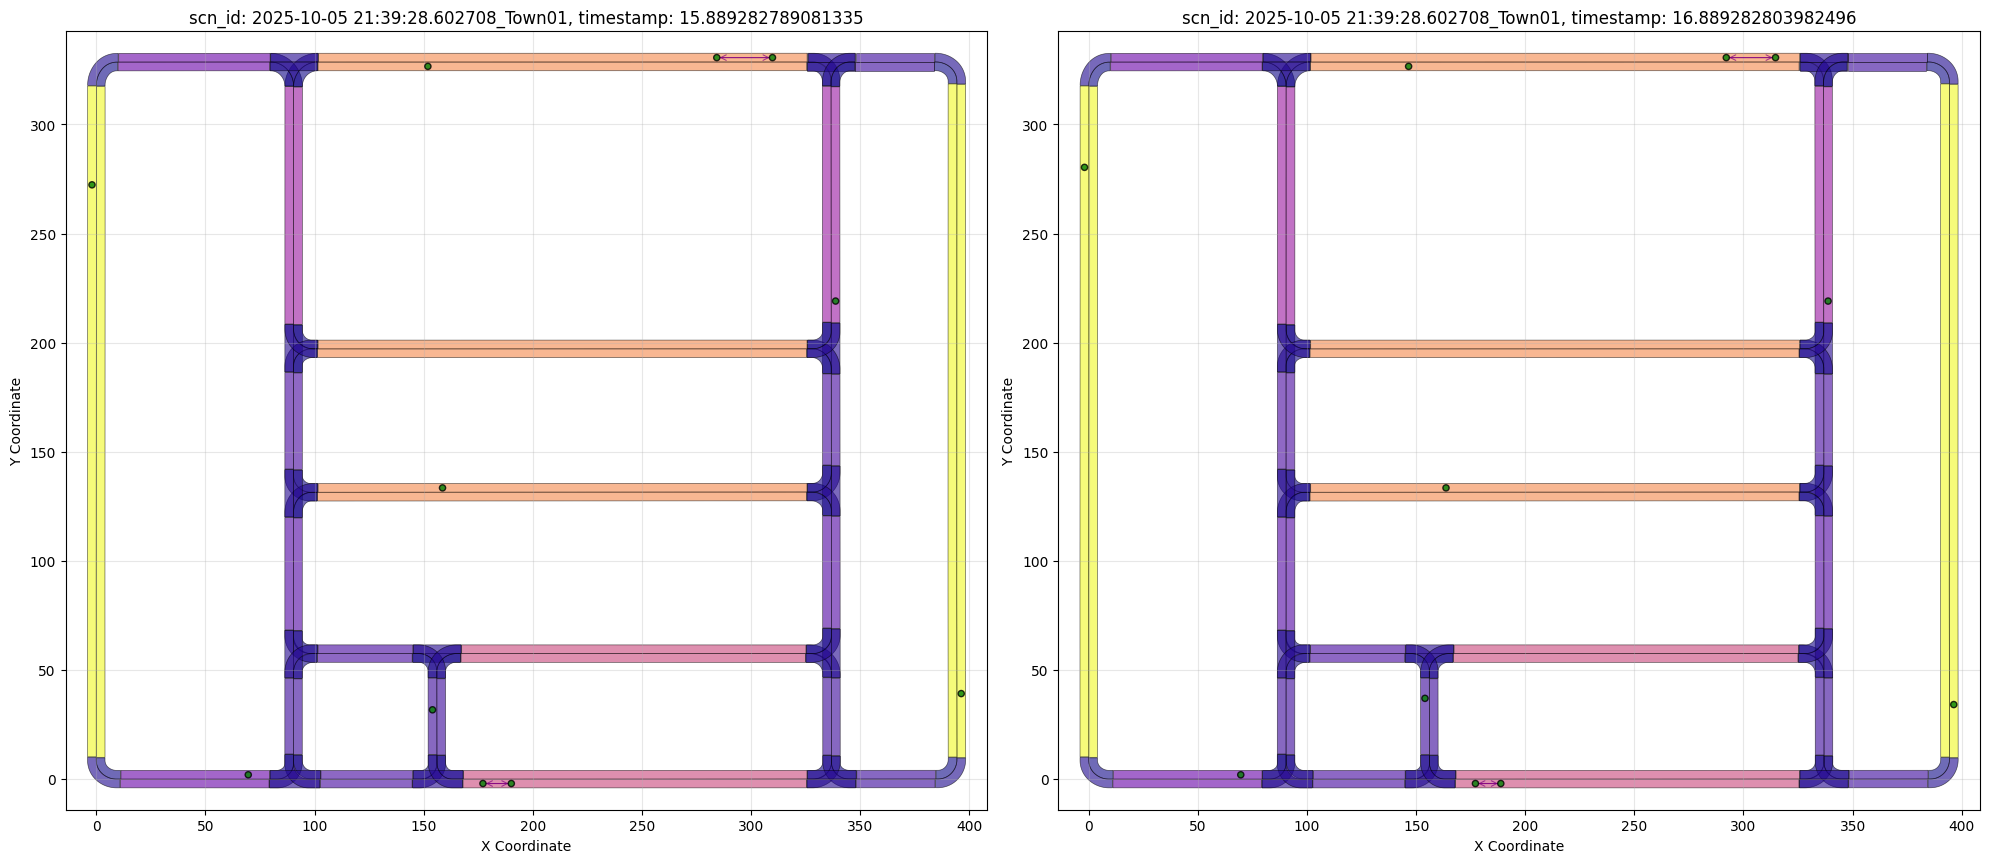

count    630.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


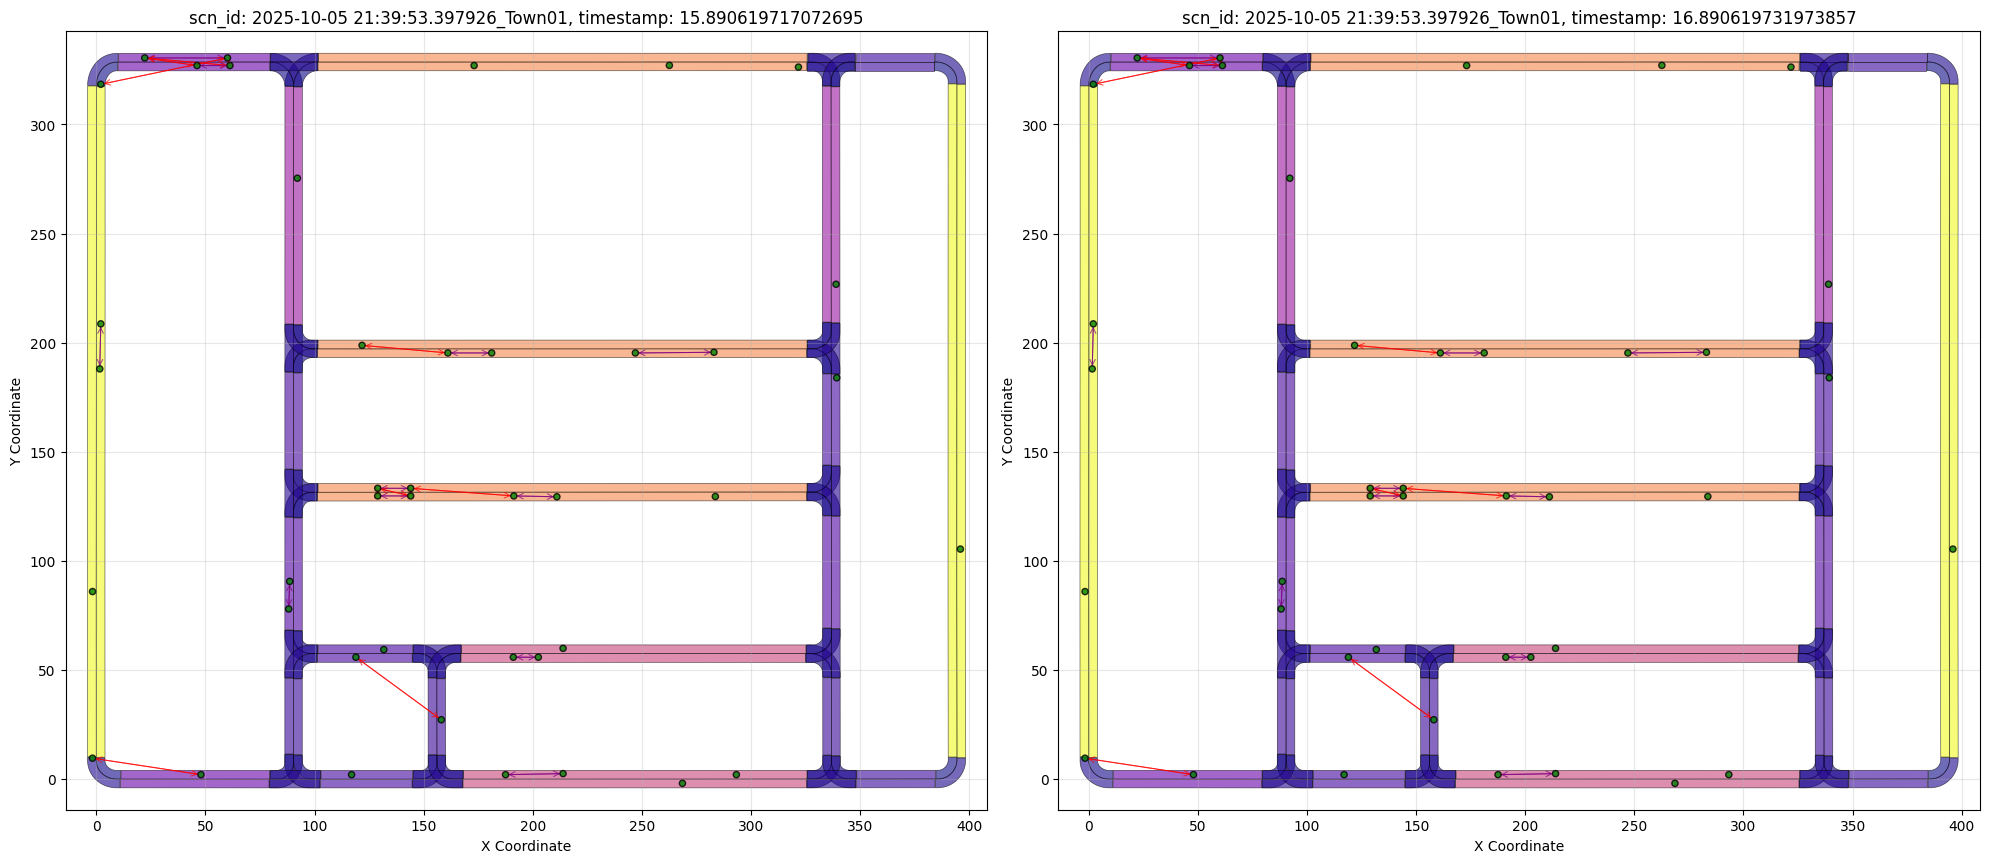

count    420.000000
mean       0.000196
std        0.004007
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.082123
Name: distance, dtype: float64


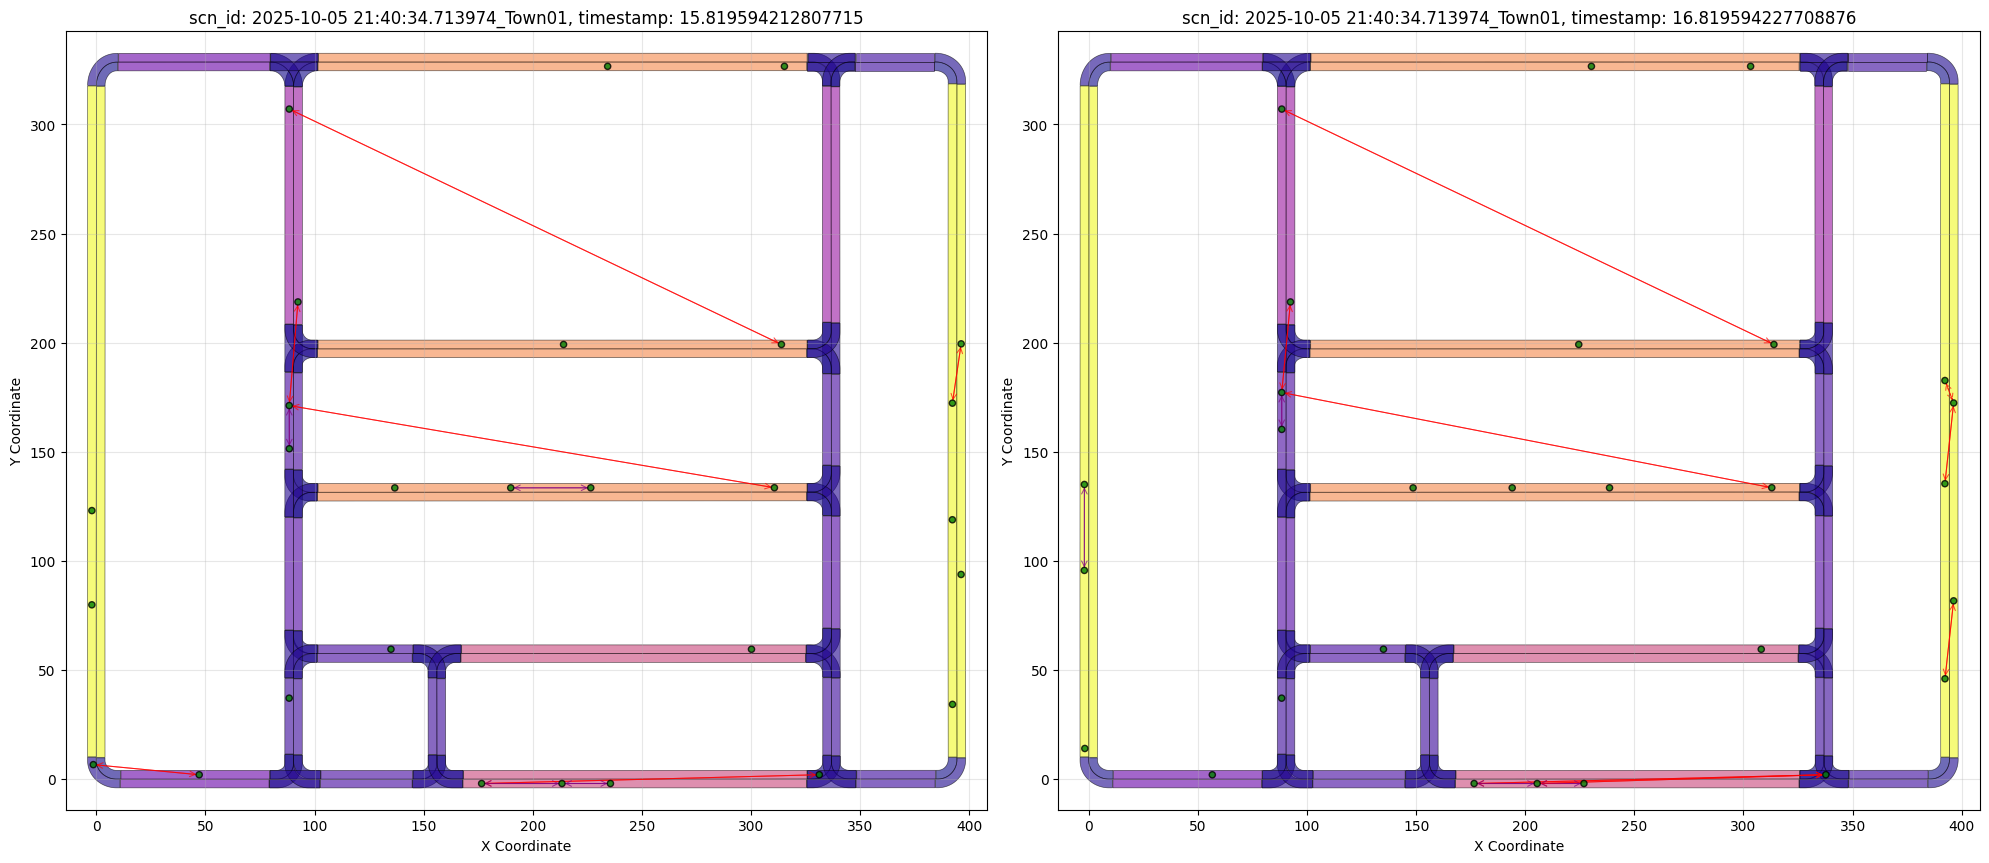

count    345.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


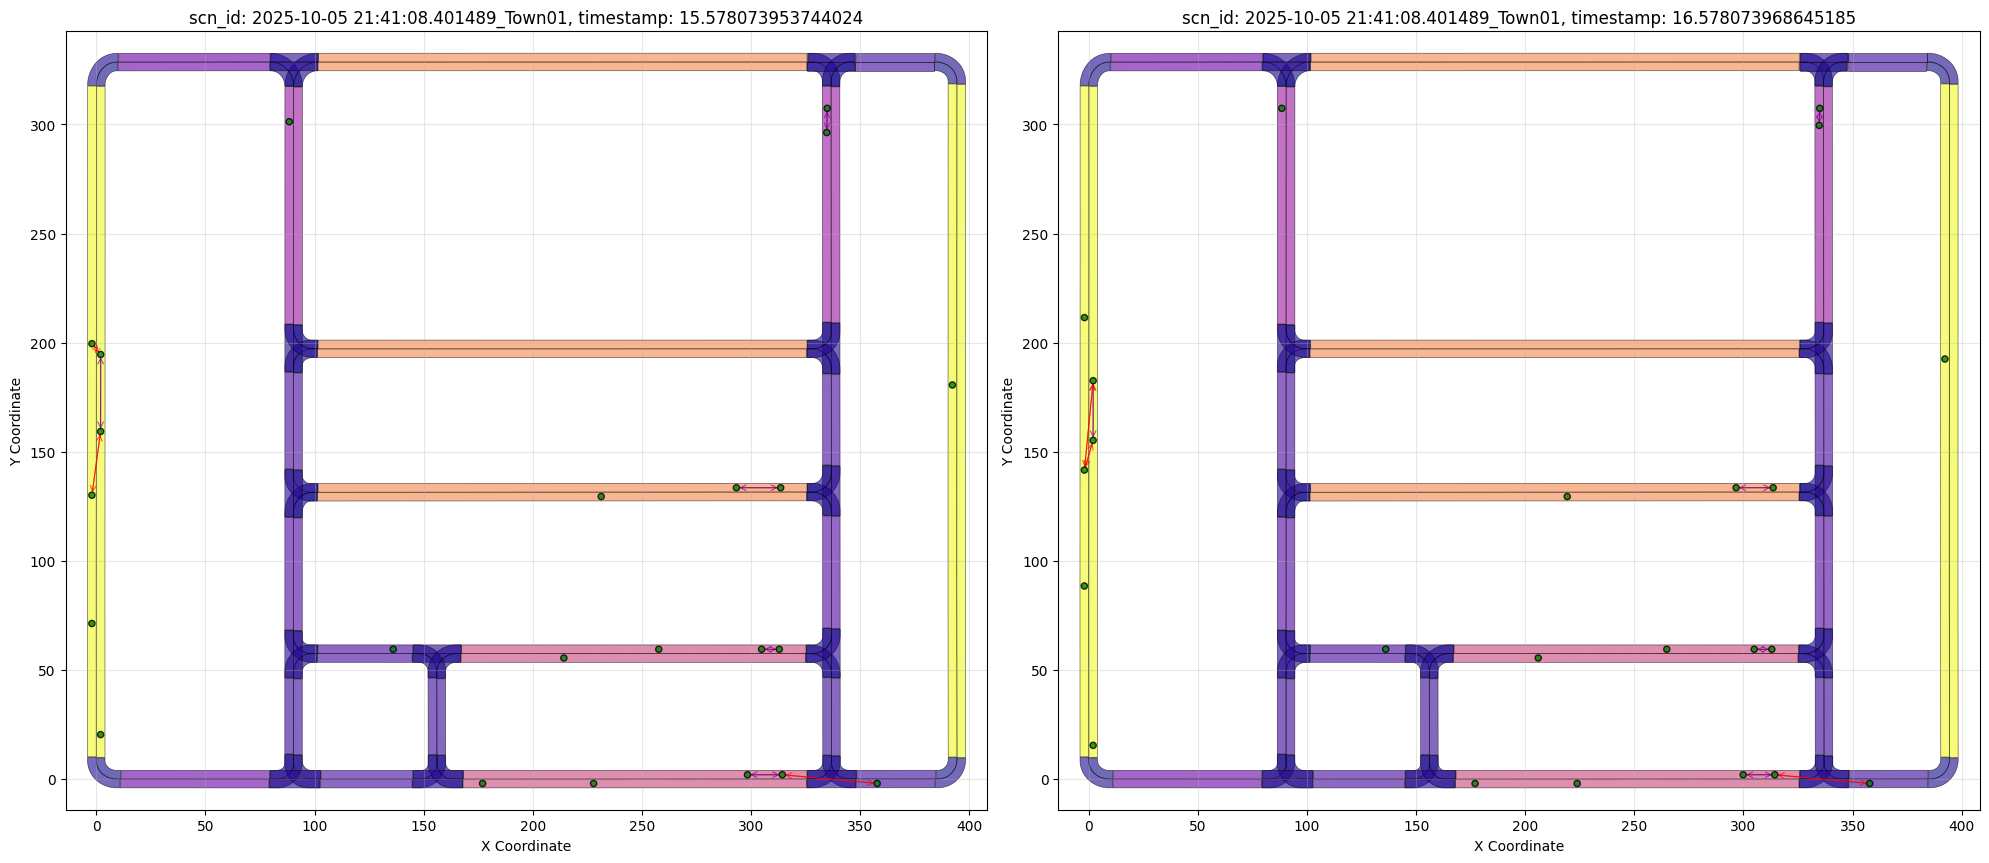

count    870.000000
mean       0.000055
std        0.001637
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.048279
Name: distance, dtype: float64


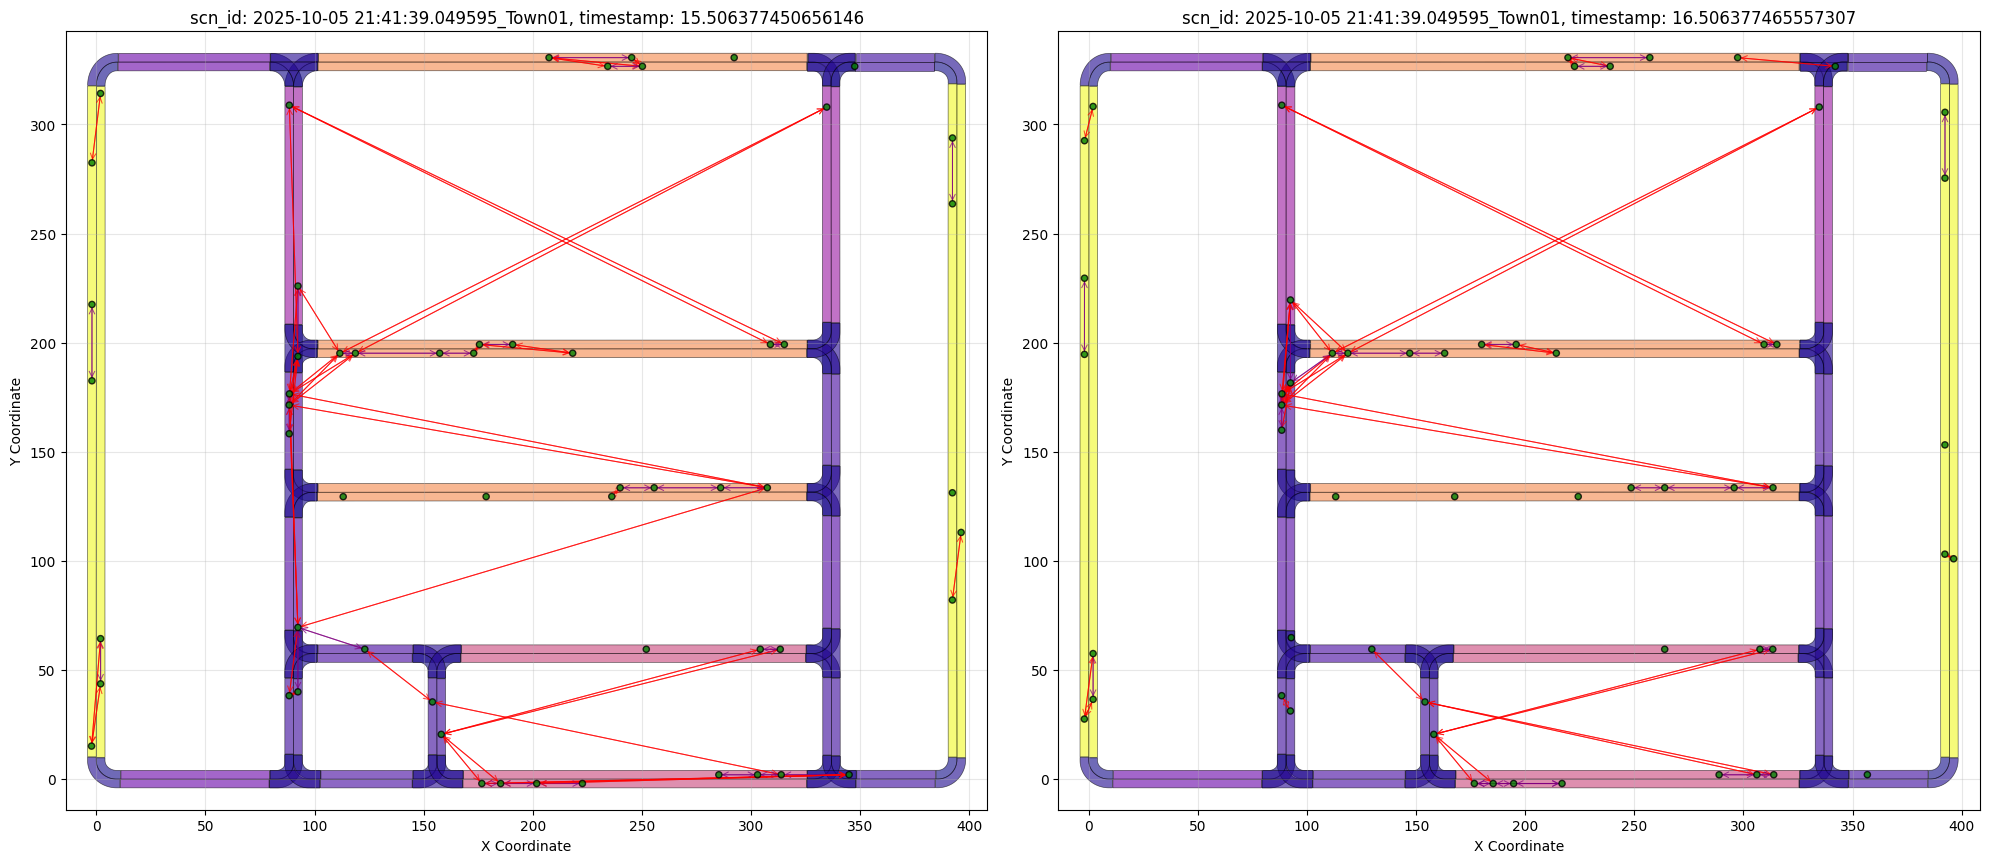

count    855.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


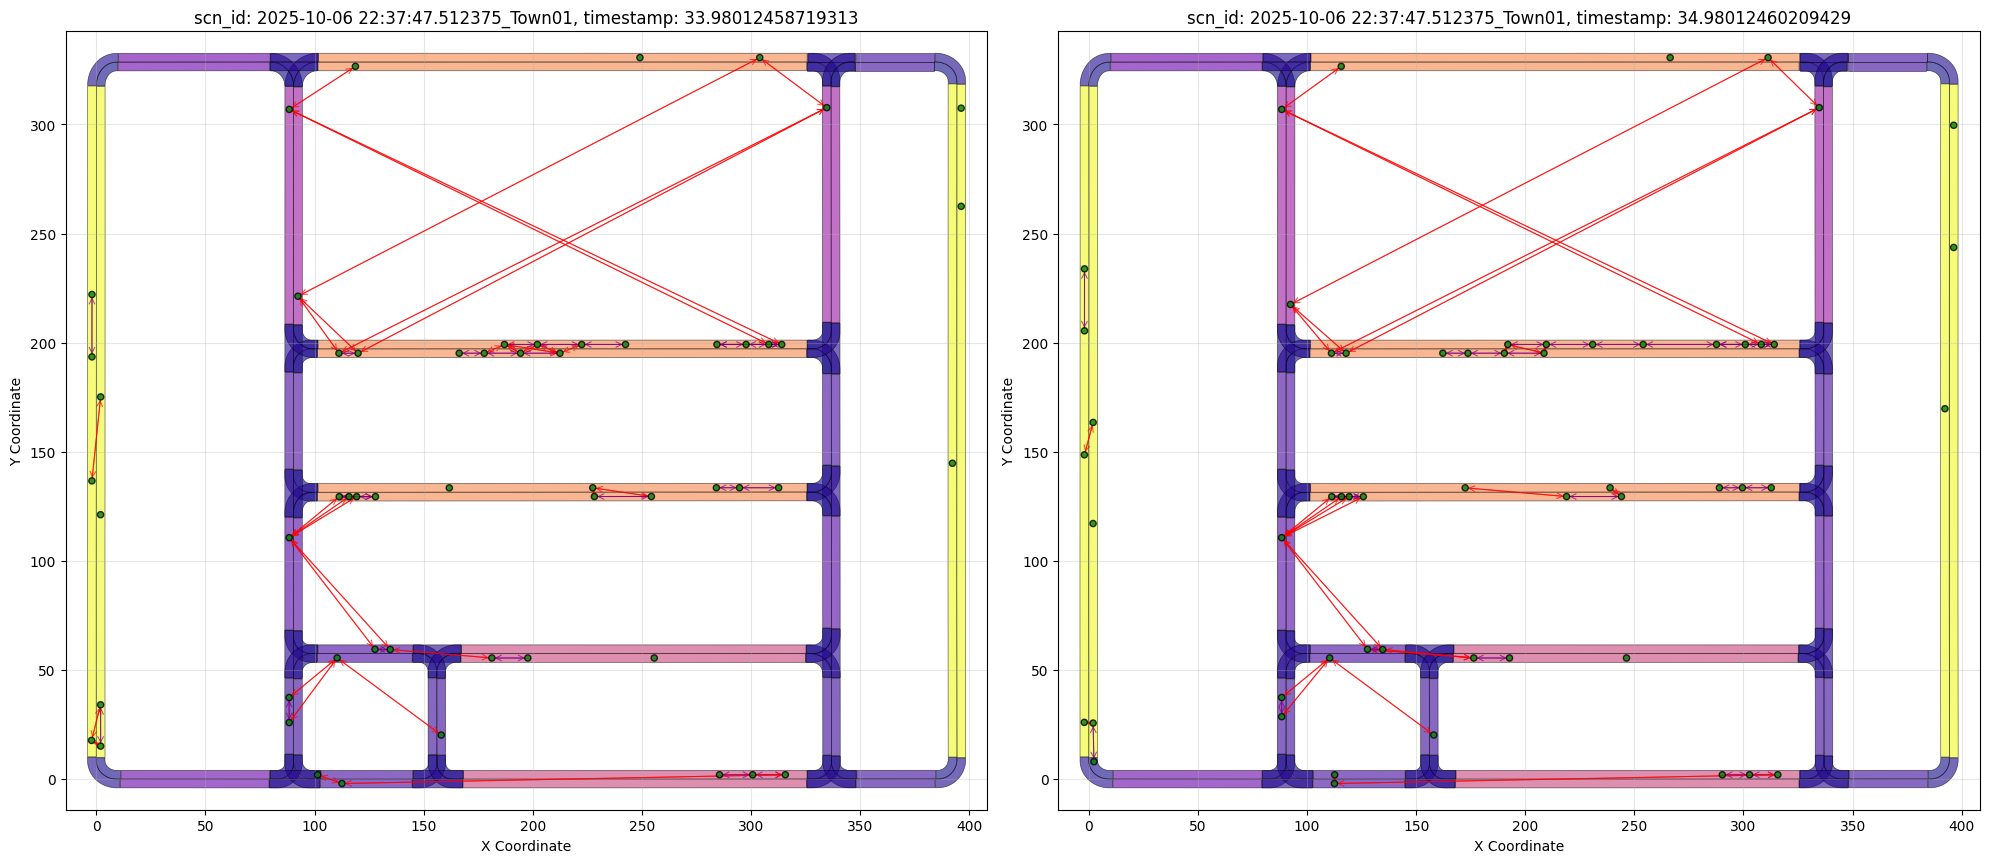

count    240.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


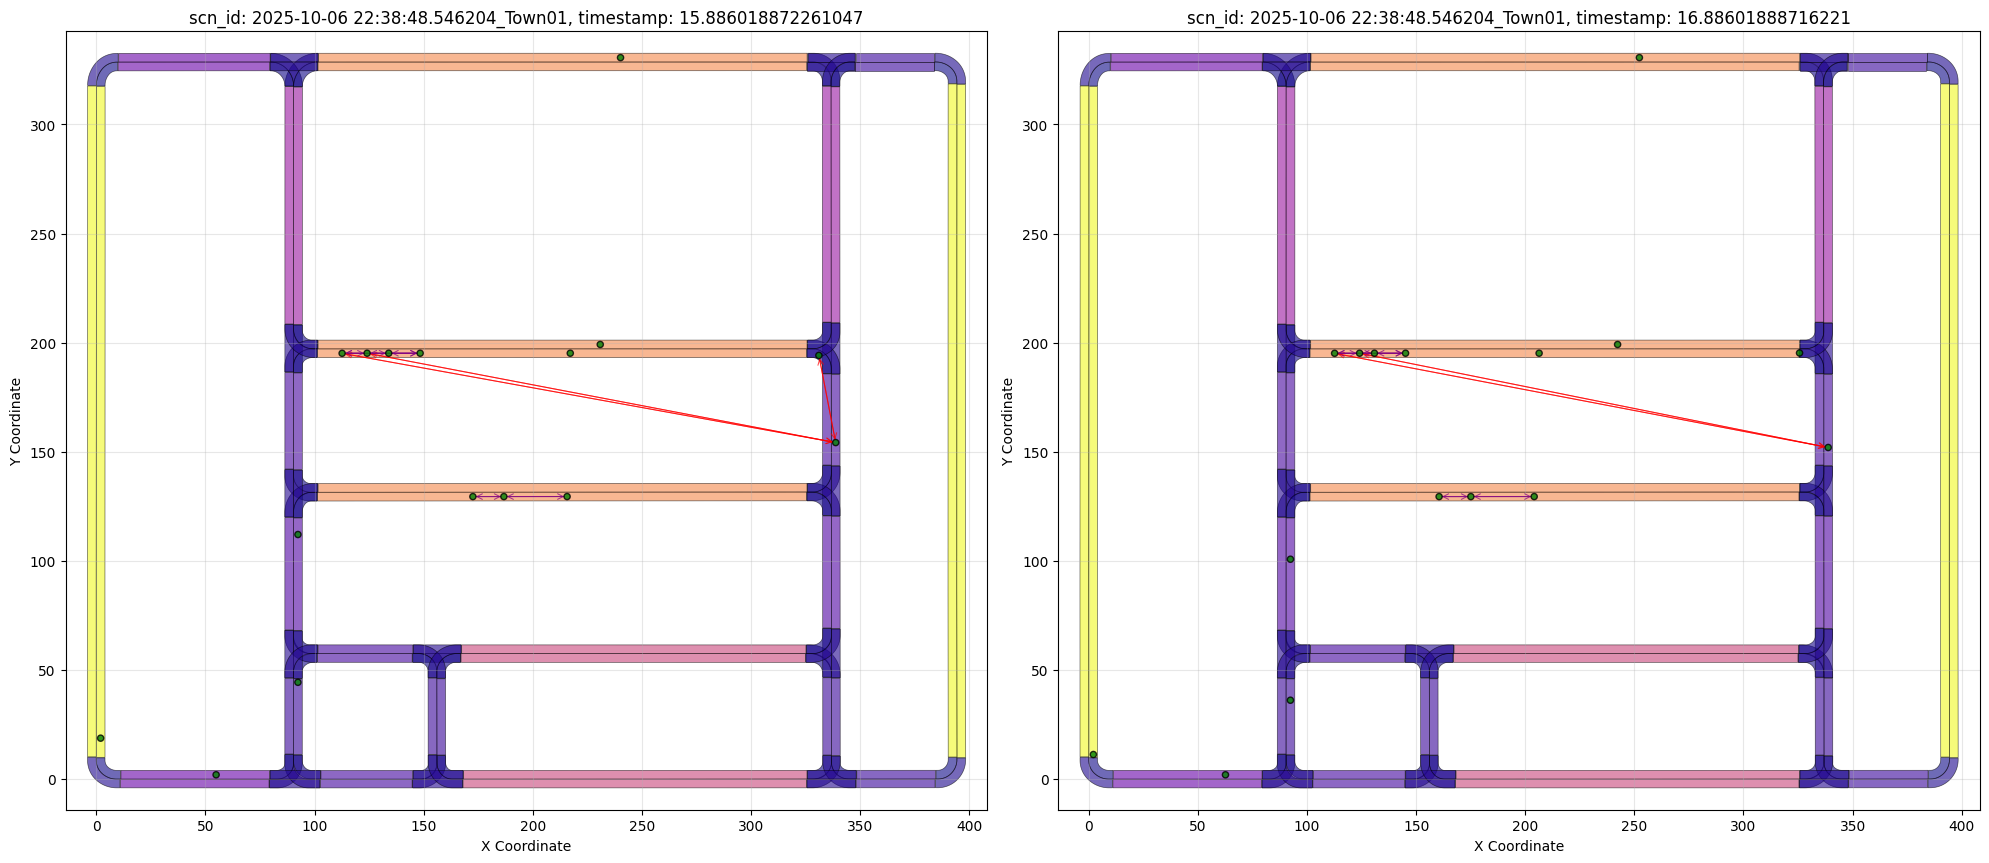

count    480.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


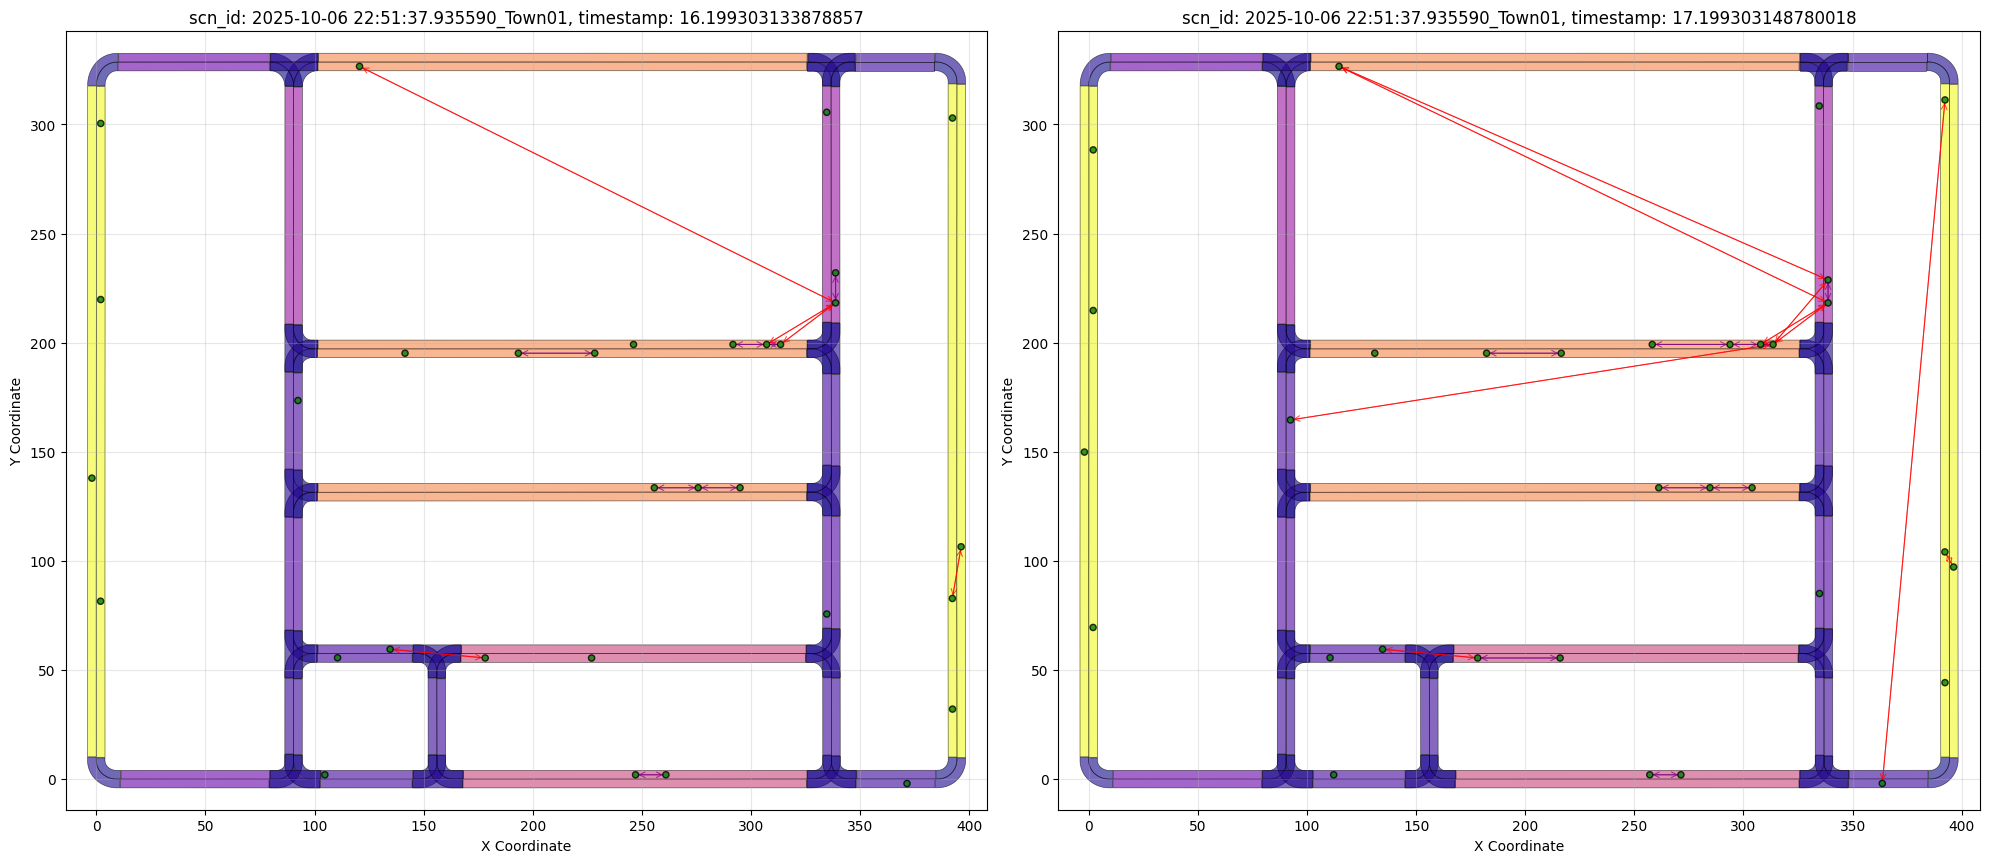

count    720.000000
mean       0.000474
std        0.009025
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.187278
Name: distance, dtype: float64


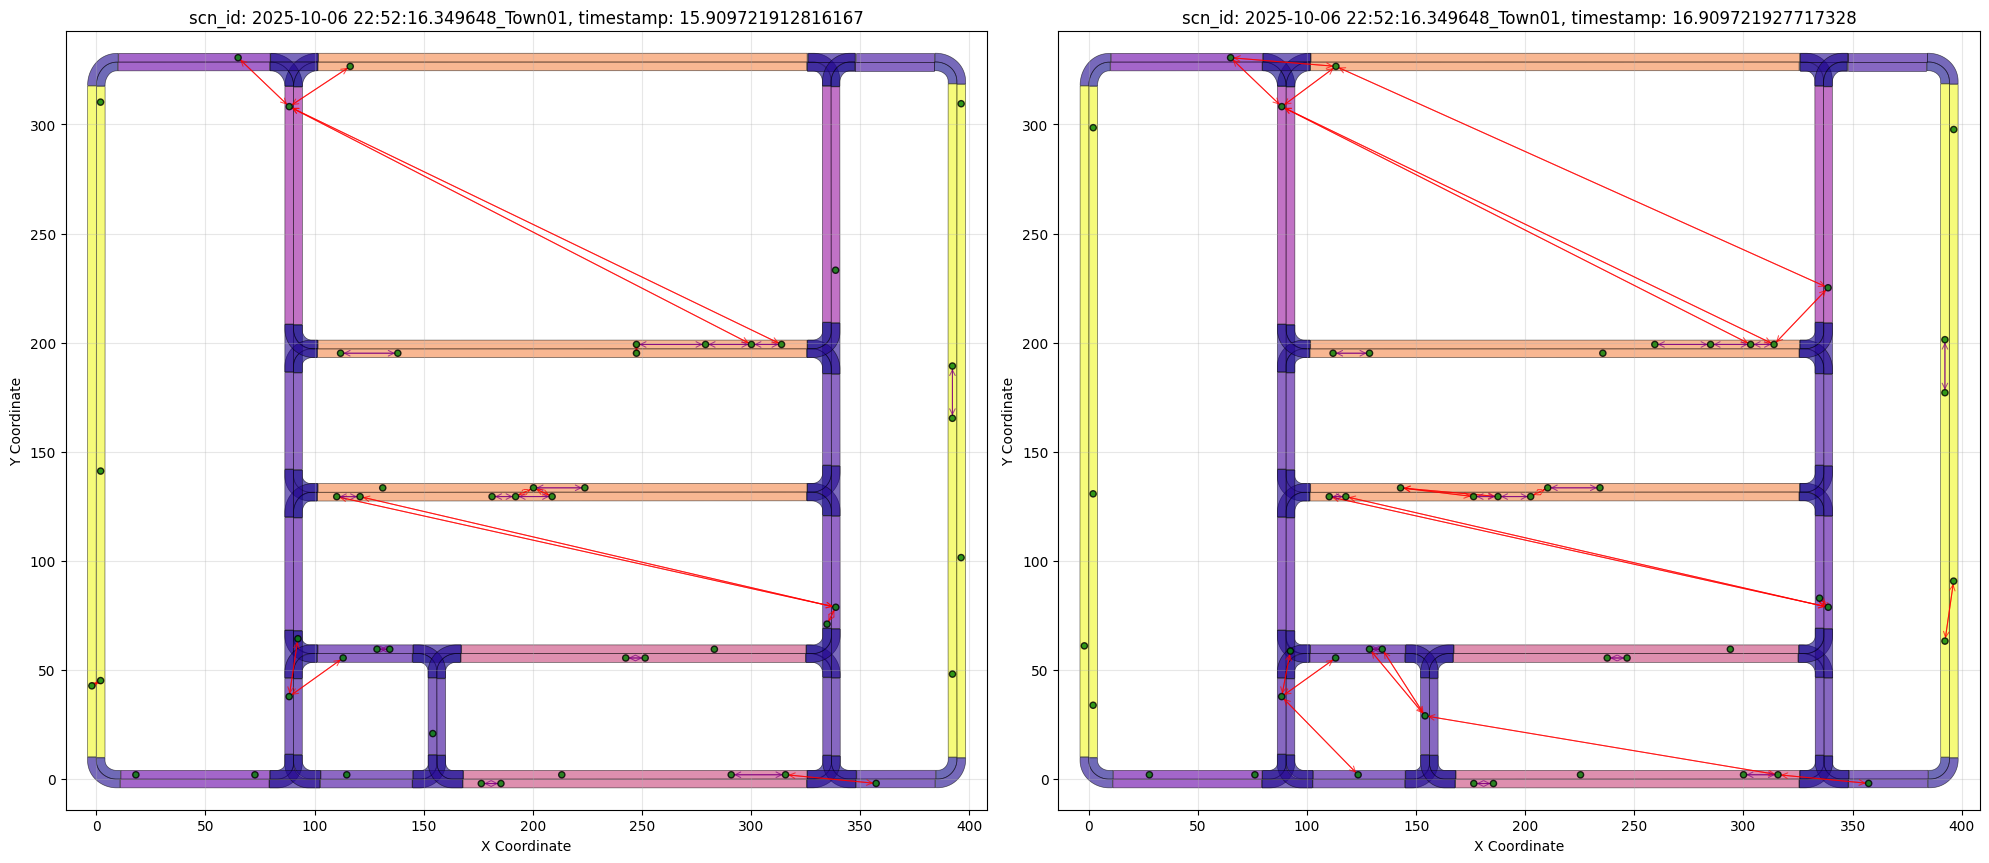

count    780.000000
mean       0.000111
std        0.003111
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.086880
Name: distance, dtype: float64


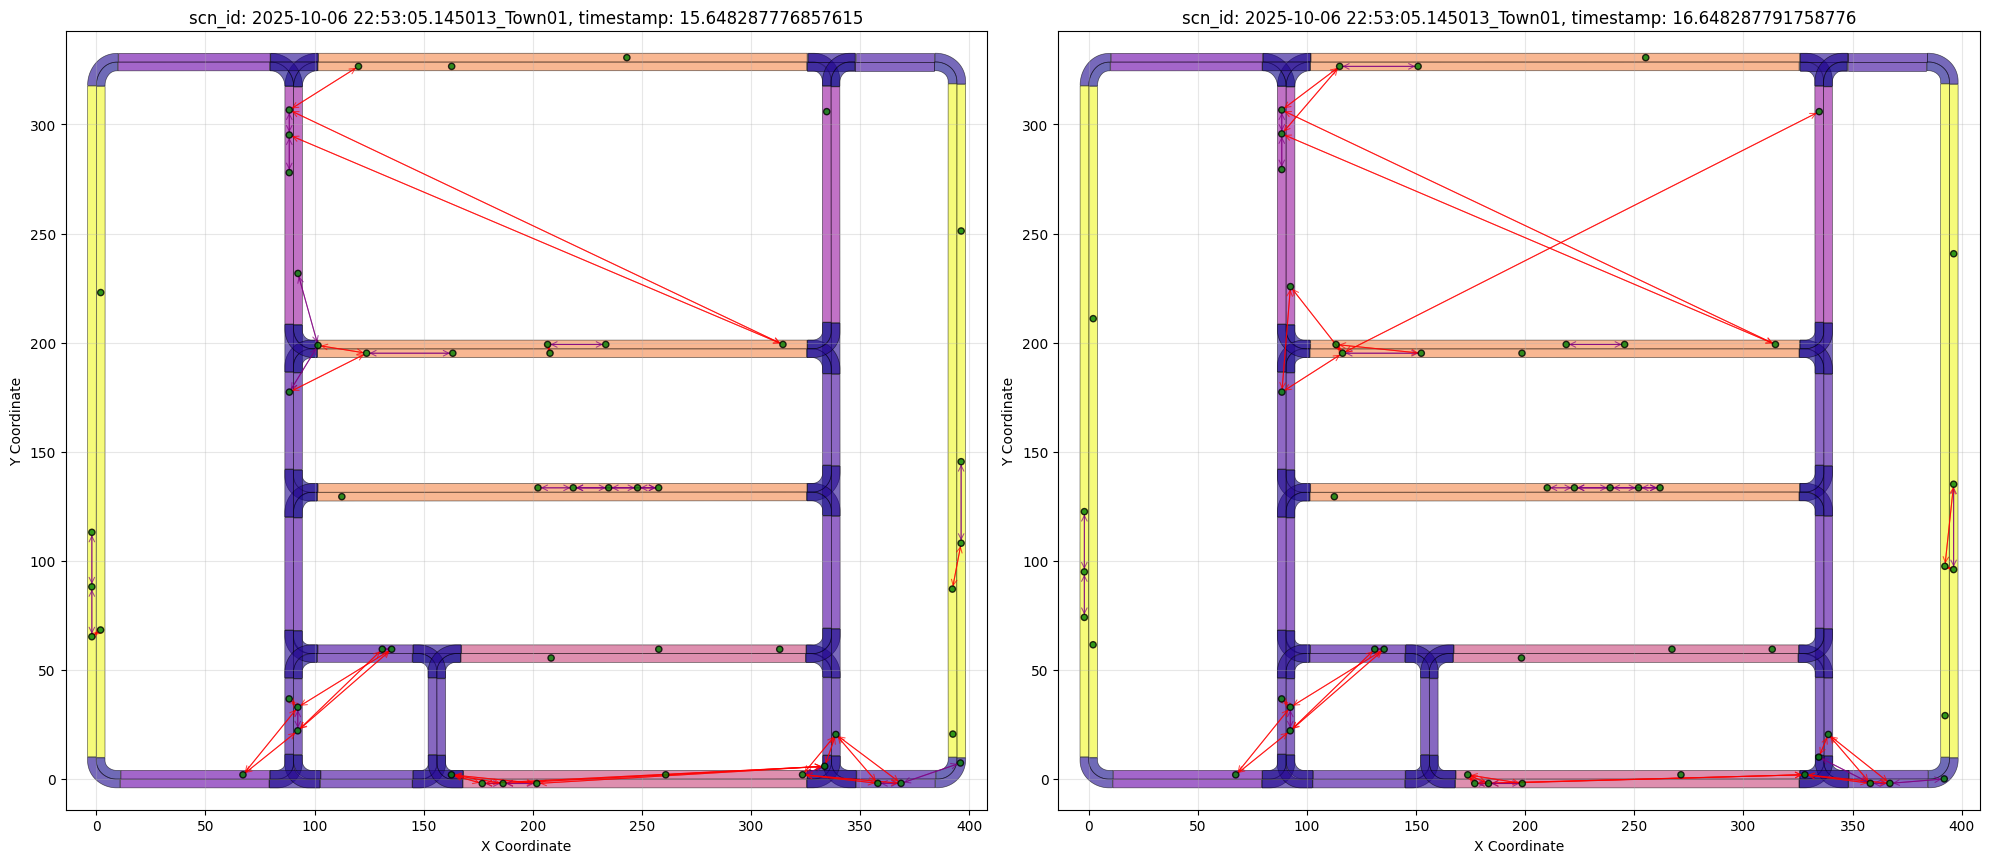

count    255.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


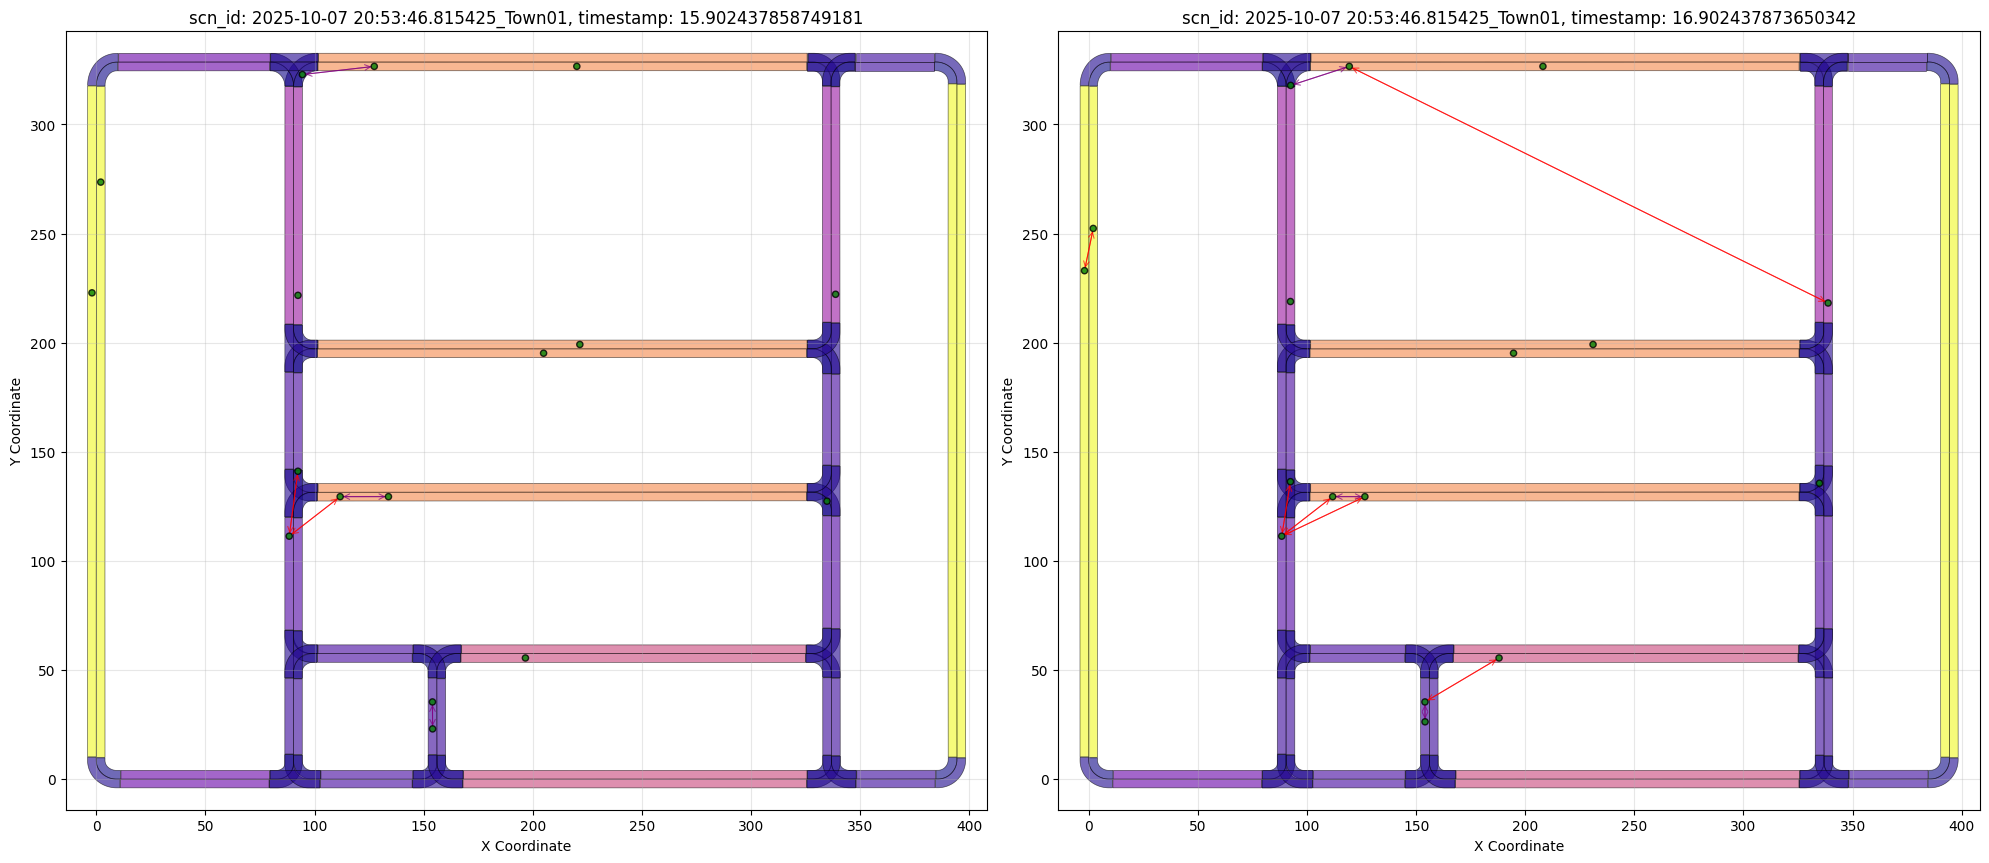

count    720.000000
mean       0.000288
std        0.007718
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.207085
Name: distance, dtype: float64


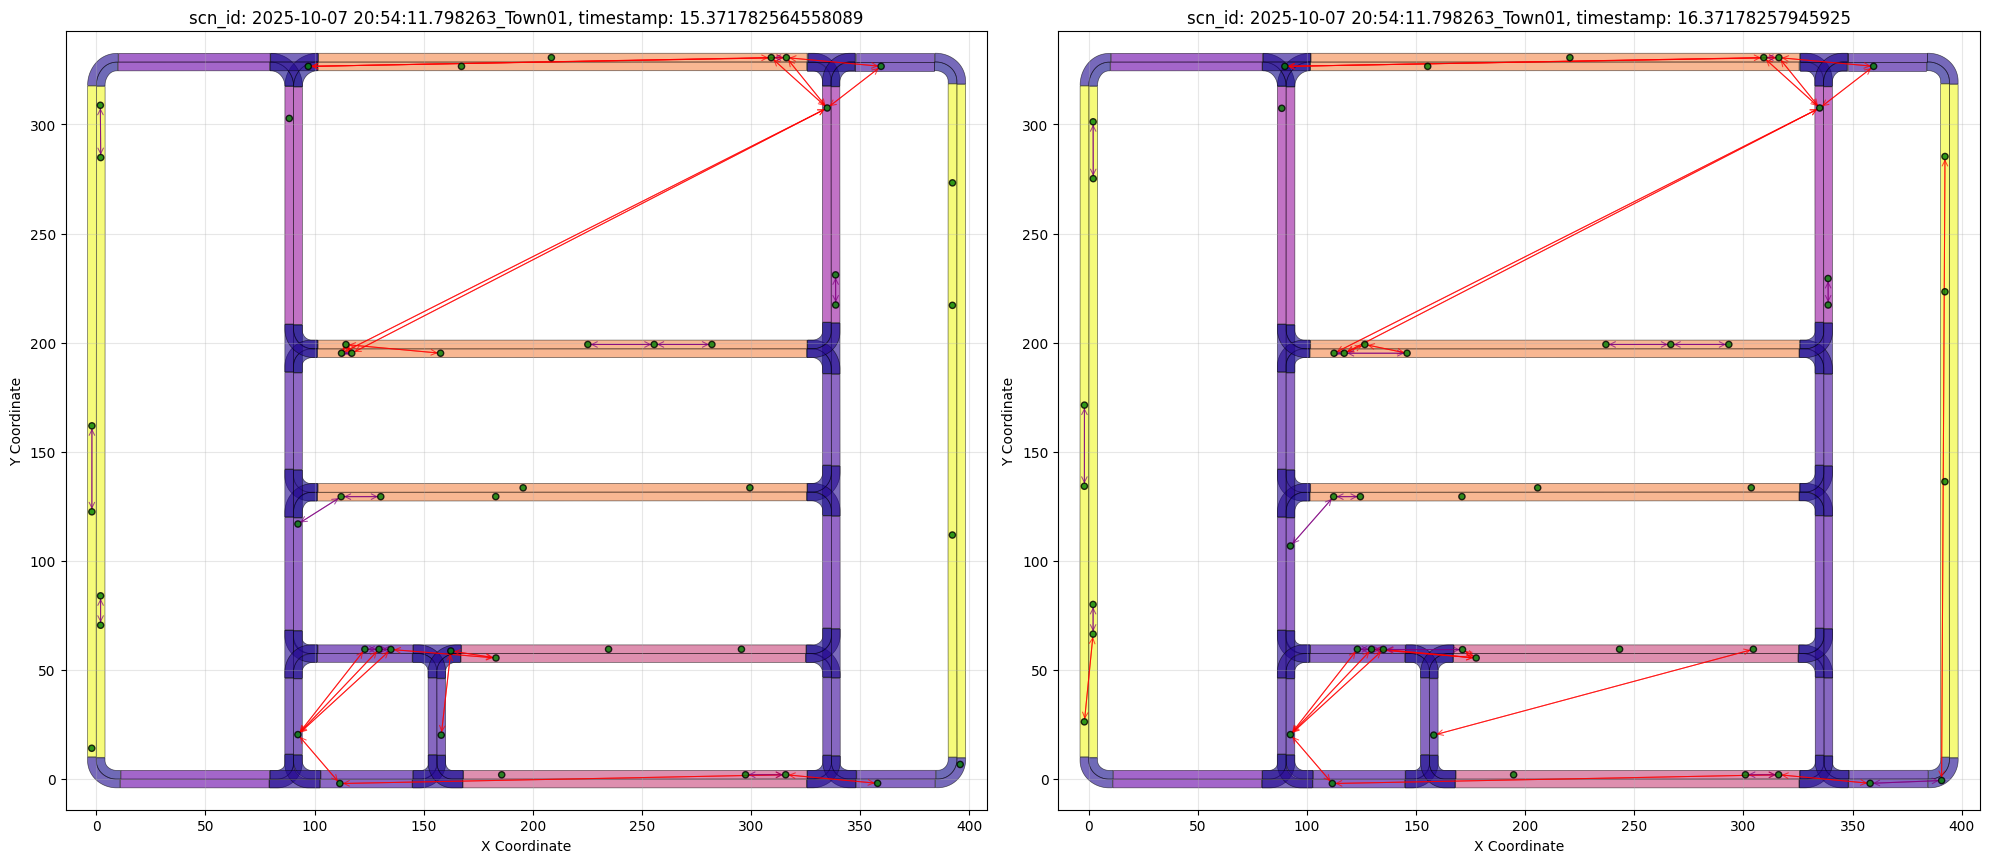

count    525.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


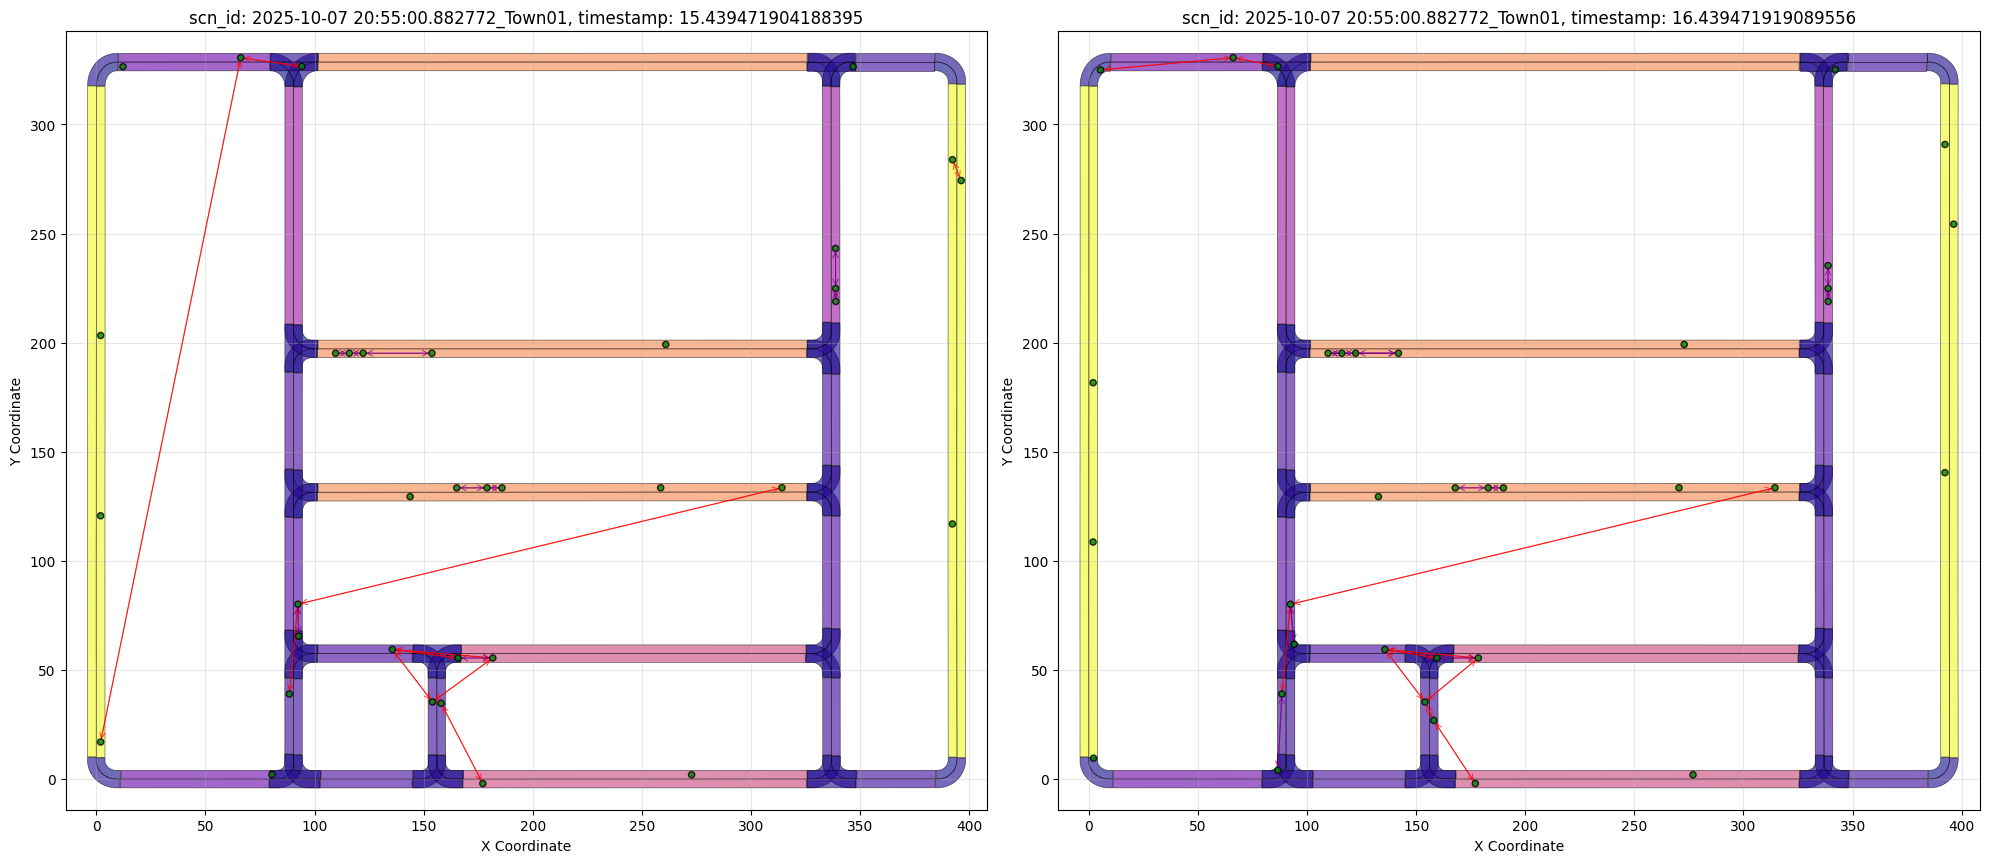

count    195.00000
mean       0.00035
std        0.00489
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        0.06828
Name: distance, dtype: float64


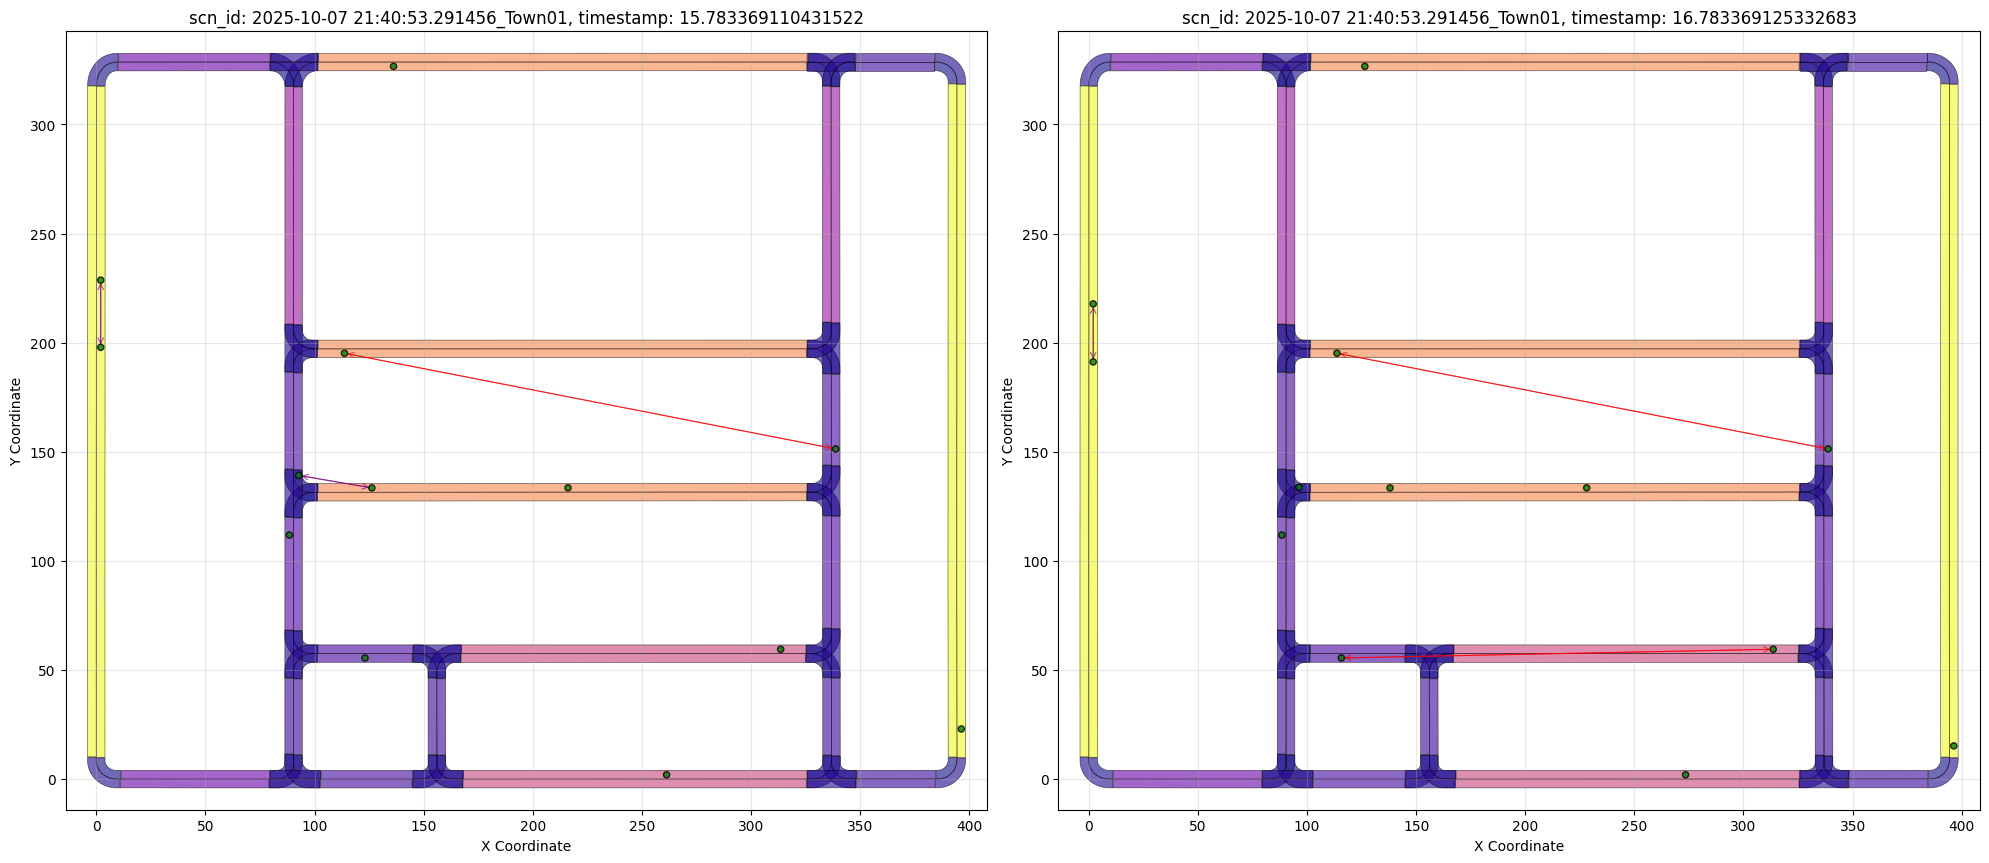

count    375.000000
mean       0.001187
std        0.016325
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.246585
Name: distance, dtype: float64


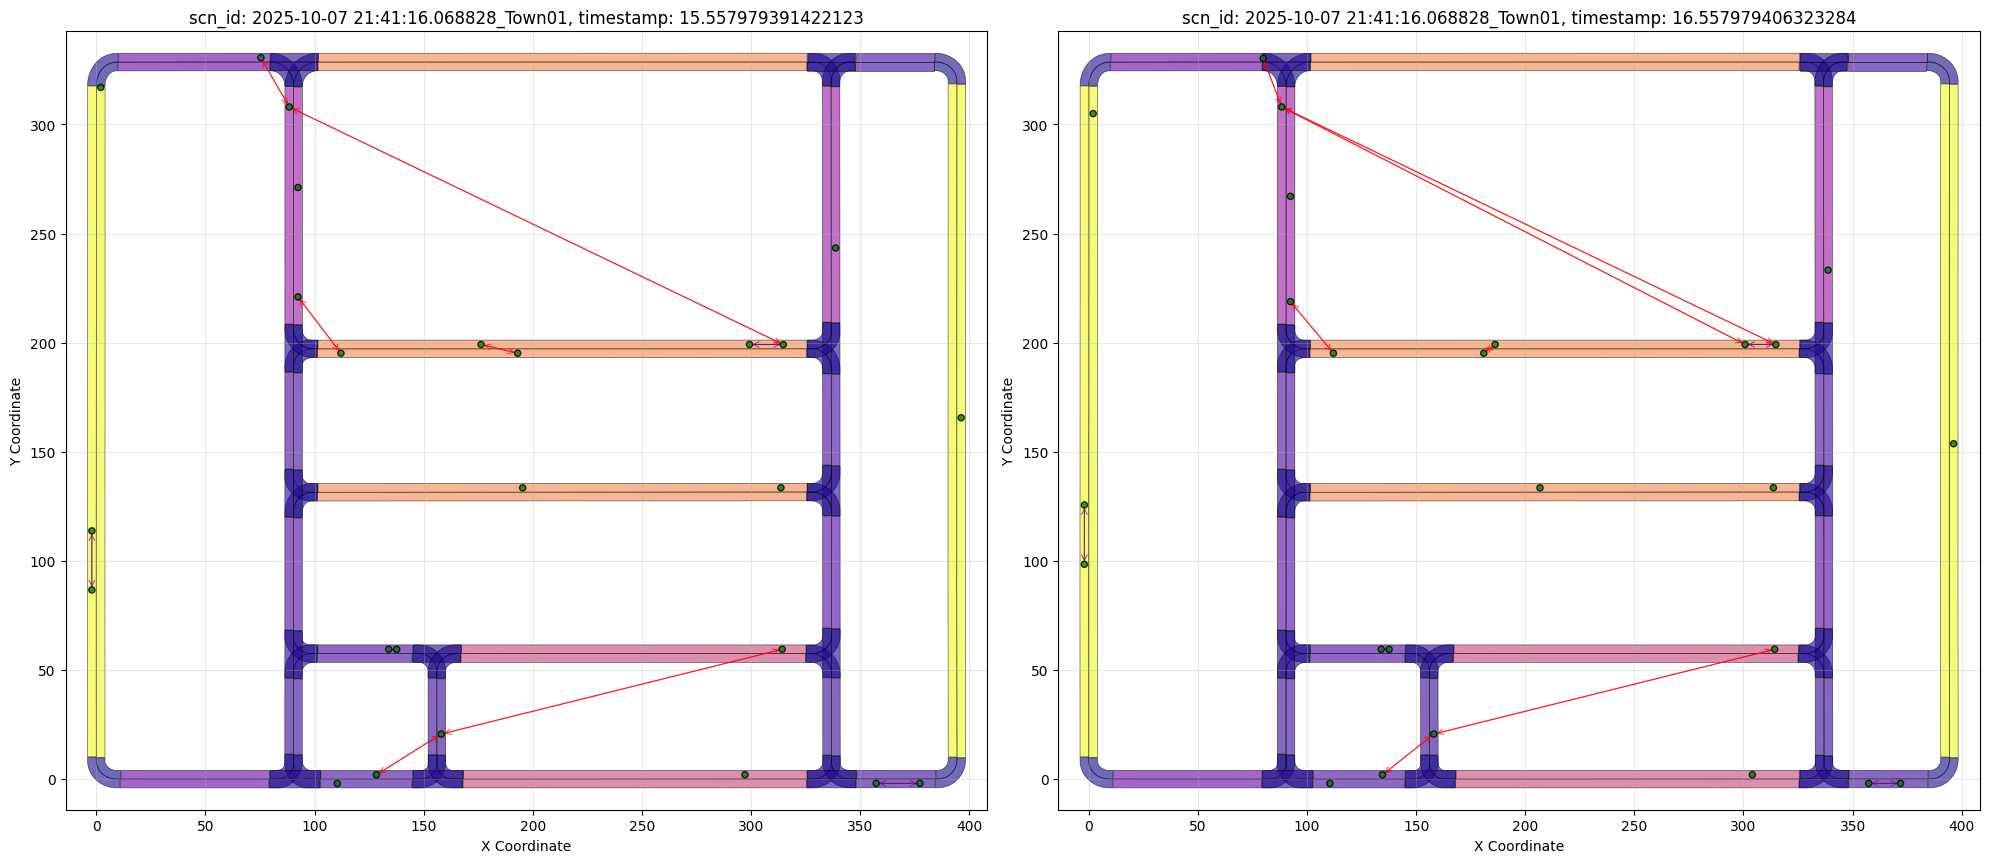

count    900.000000
mean       0.000398
std        0.007833
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.206271
Name: distance, dtype: float64


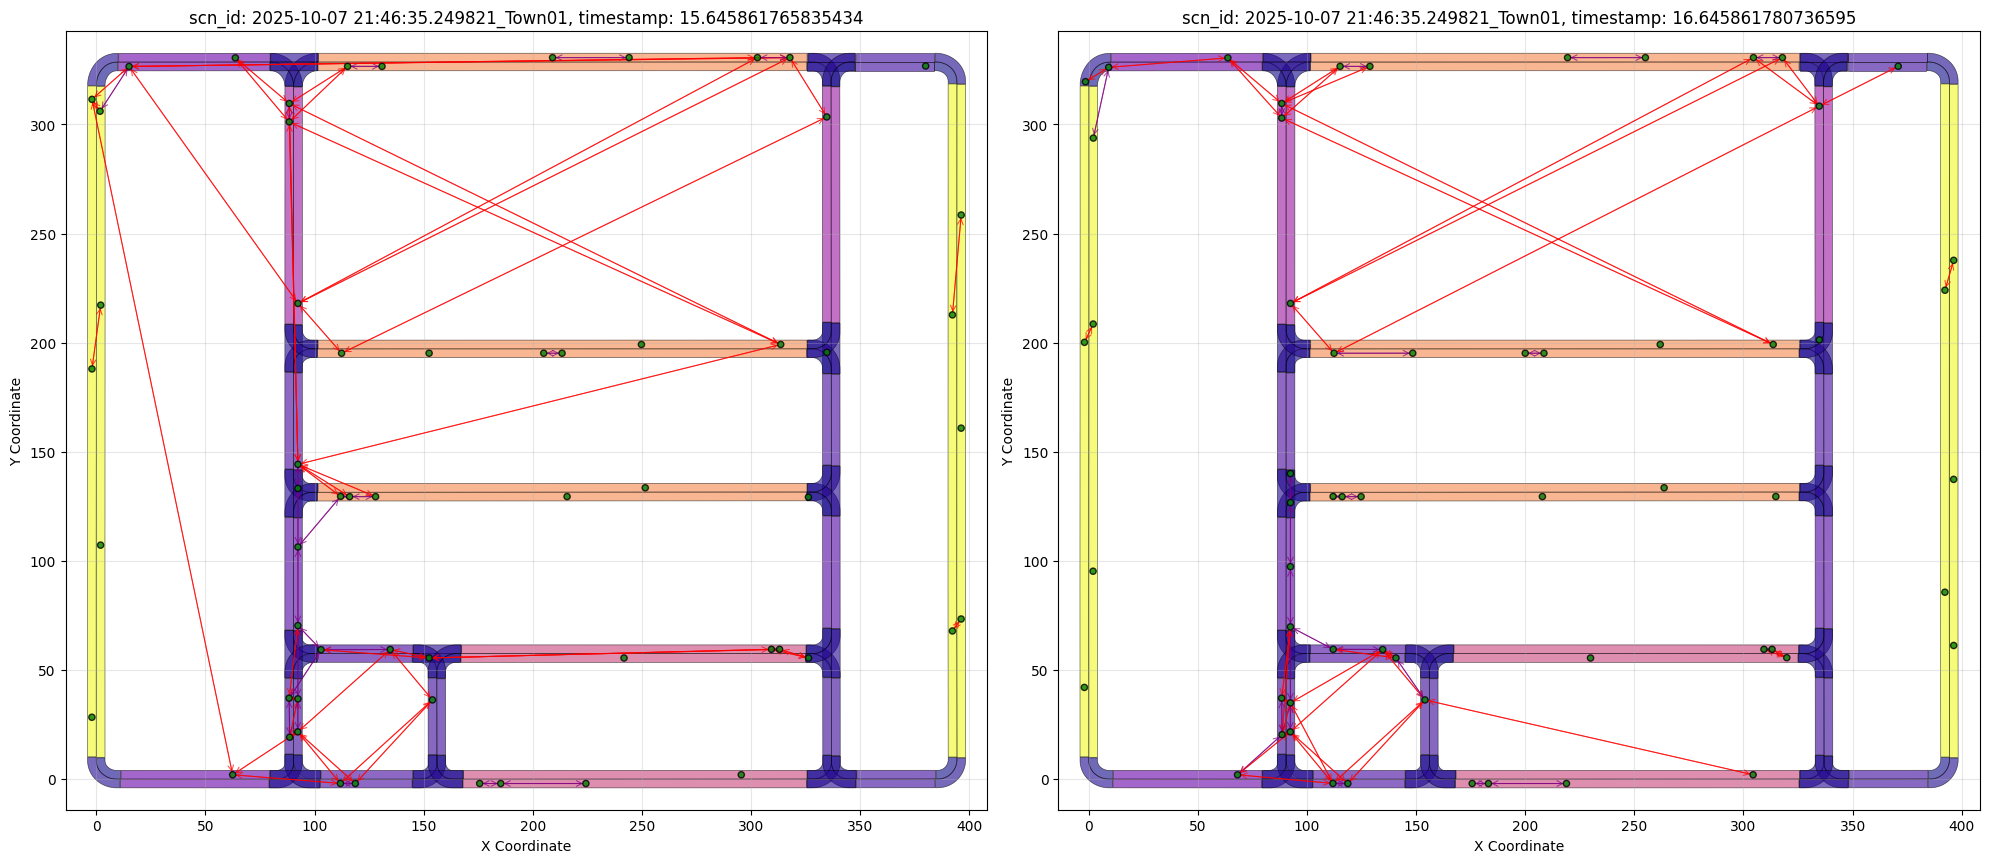

count    810.000000
mean       0.000123
std        0.003498
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.099568
Name: distance, dtype: float64


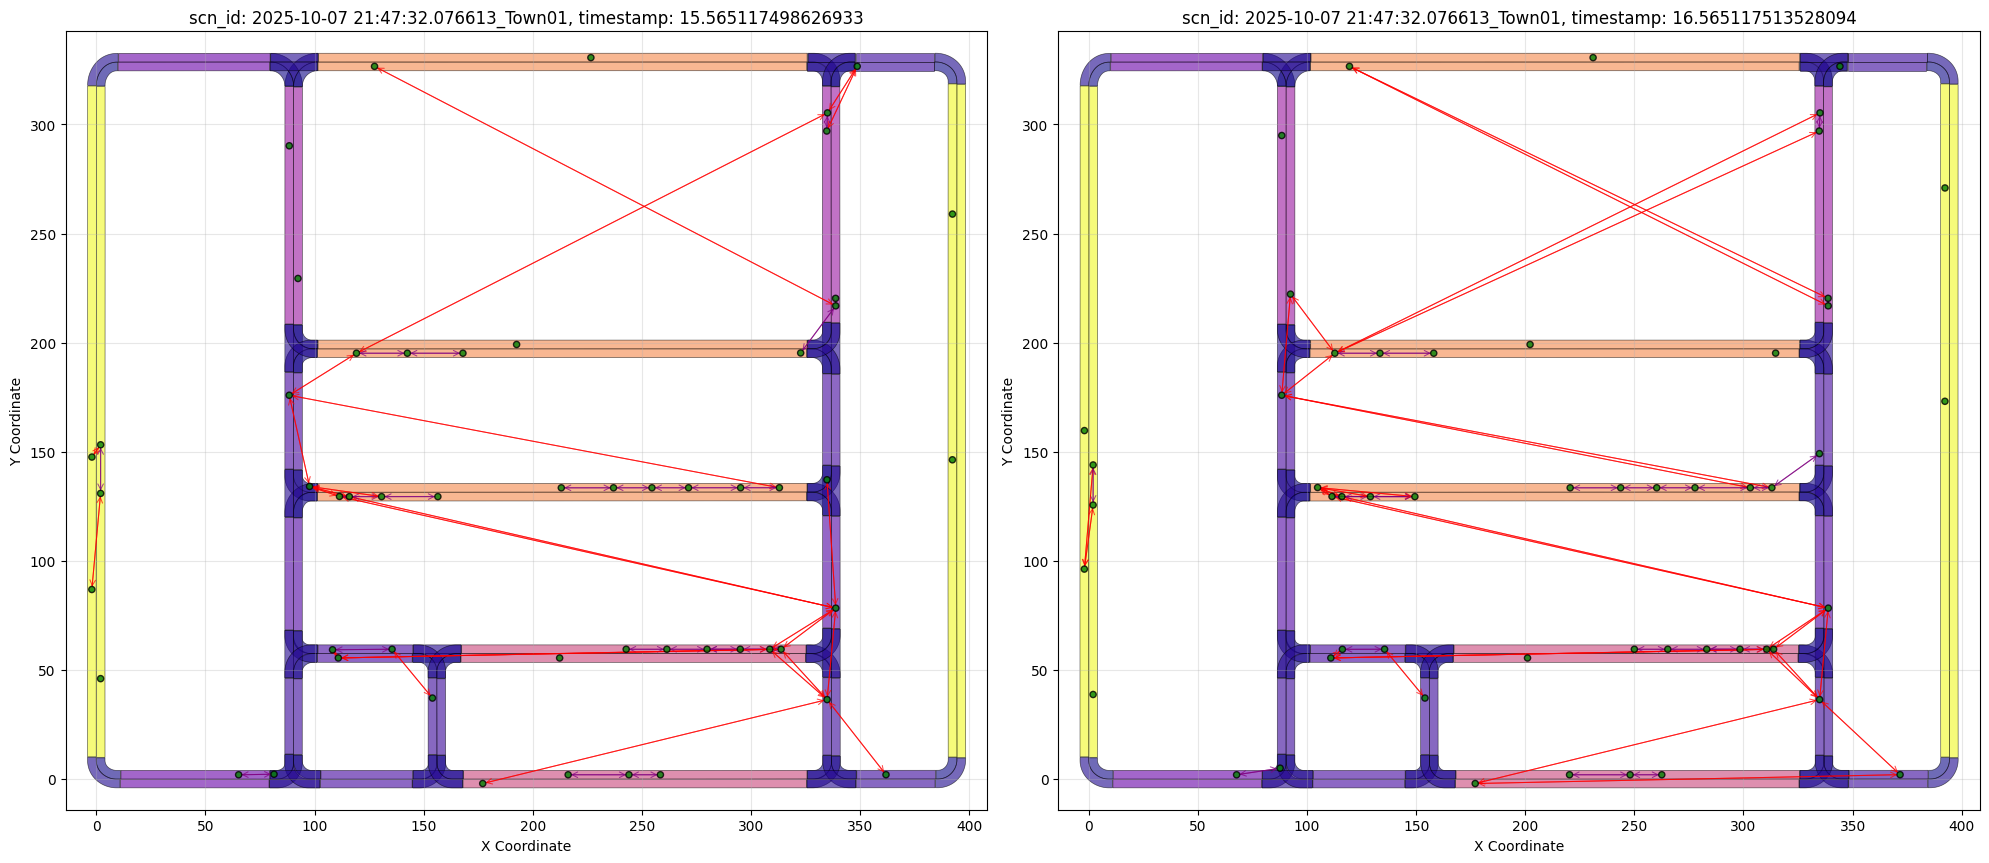

count    855.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


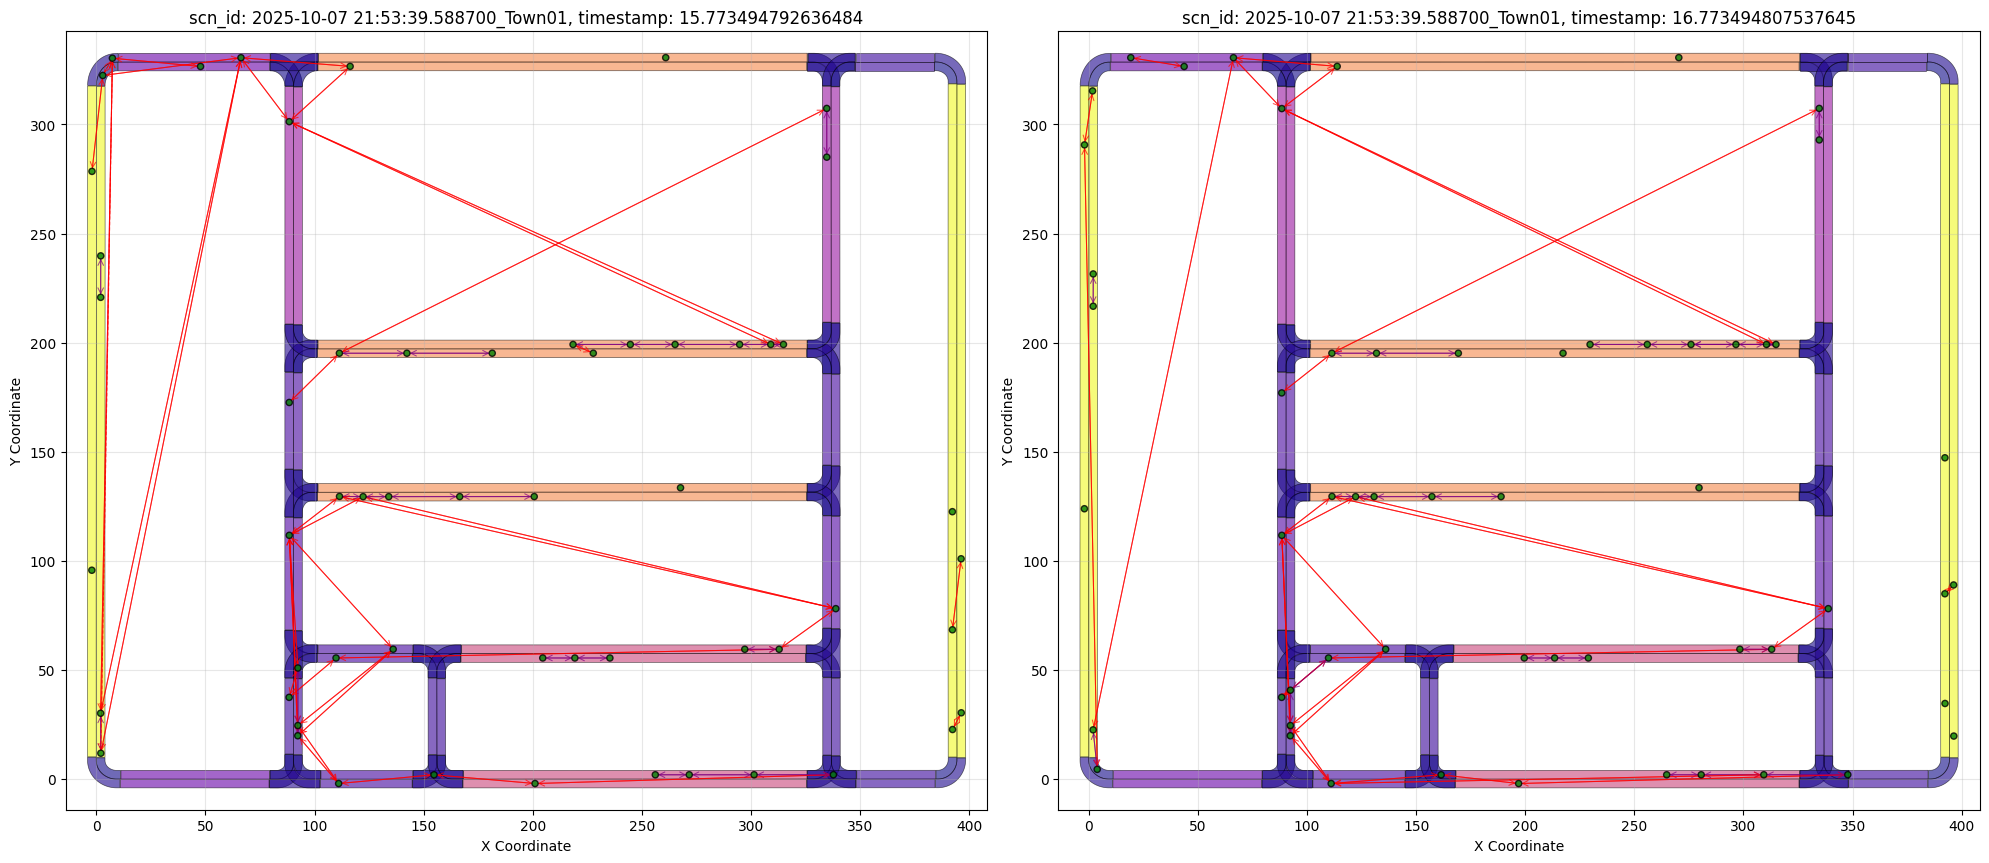

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ceac9f863b0>>
Traceback (most recent call last):
  File "/home/tmuehlen/.cache/pypoetry/virtualenvs/graph-creator-_1ofKhL9-py3.10/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


count    795.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: distance, dtype: float64


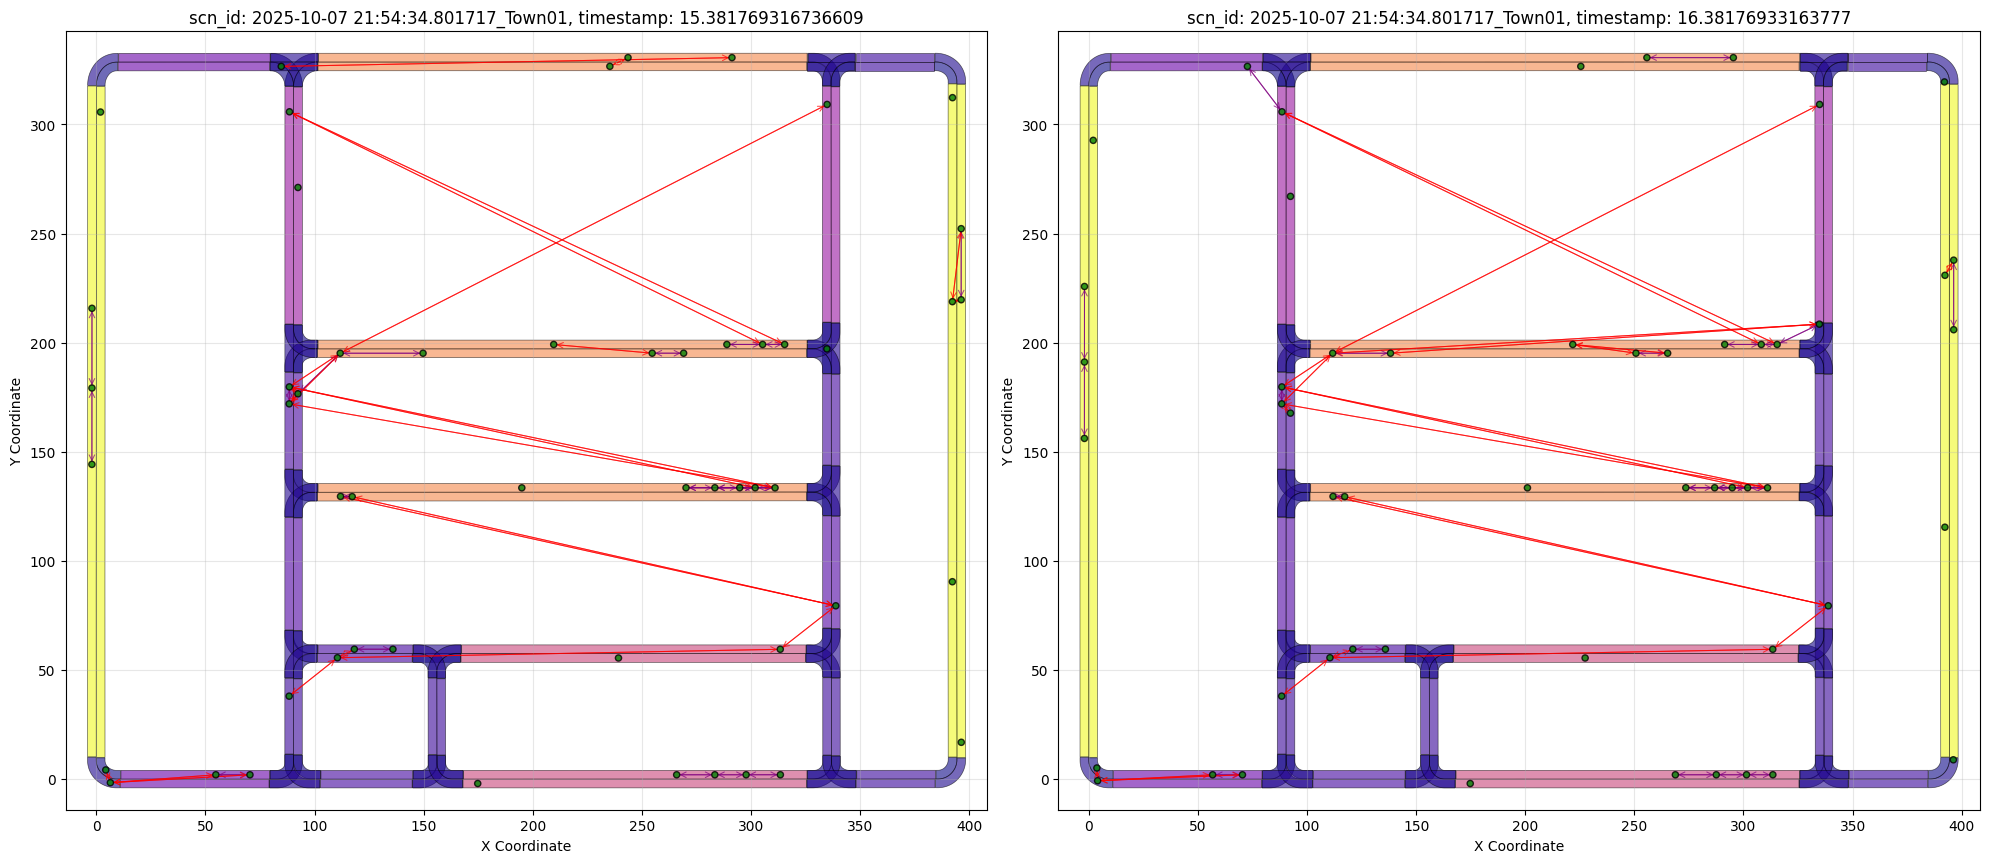

In [ ]:
#i = 354
#for i in range(10, 360, 5):
#scn_id = scn_ids[i]

# scn_id = "2025-10-05 15:42:29.792500_Town01"
# scn_id = "2025-10-05 15:46:00.612831_Town01_Opt"
# scn_id = "2025-10-05 15:46:51.769019_Town02_Opt"
#scn_id = "2025-10-05 15:48:10.621007_Town02"
t = 9
# print(scn_id)
for scn_id in scn_ids[:3]:
    tracks = pd.read_parquet(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_tracks.parquet')
    tracks['road_lane_id'] = tracks.road_id.astype(str) + '_' + tracks.lane_id.astype(str)
    # print(tracks.shape)
    timestamps = tracks.timestamp.unique().tolist()
    actors = tracks.actor_id.unique().tolist()
    #tracks.head(2).T
    g_map = MapGraph()
    g_map.read_graph_from_file(f'/home/tmuehlen/repos/graph_coverage/carla/data/scene_{scn_id}_map_graph.pickle')
    # #g_map.visualize_graph()
    # fig, ax = plot_lane_map_advanced(g_map.graph, color_by_length=True, cmap='plasma', show_labels=False)
    # plt.show()
    ag = ActorGraph()
    ag_carla = ag.from_carla_scenario(tracks, 
        g_map, 
        delta_timestep_s=1.0,
        max_distance_lead_veh_m=40,
        max_distance_opposite_forward_m=50,
        max_distance_opposite_backward_m=10,
        max_distance_neighbor_forward_m=20,
        max_distance_neighbor_backward_m=20,
        max_node_distance_leading=3,
        max_node_distance_neighbor=2,
        max_node_distance_opposite=2,
        )
    ag_carla.actor_graphs.keys()
    # clean up the graphs and components, i.e. remove components with only one node:
    keys = list(ag_carla.actor_graphs.keys())
    for  key in keys:
        ag_carla.actor_components[key] = [ag_carla.actor_components[key][i] for i in range(len(ag_carla.actor_components[key])) if ag_carla.actor_components[key][i].size() > 1]
    #pd.DataFrame(ag_carla.actor_graphs[5.5085996149573475].nodes(data=True)).iloc[0,1]
    ag_timestamps = list(ag_carla.actor_graphs.keys())
    ag_carla.actor_graphs[ag_timestamps[0]].nodes(data=True)
    ag_carla.actor_graphs[ag_timestamps[0]].edges(data=True)
    # remove offroad actors:
    # Still wait for Marius input, if this is legit of not.
    offroad_df = check_offroad_actors(ag_carla, g_map)
    print(offroad_df.distance.describe())
    node_df, edge_df = make_node_edge_df(ag_carla.actor_graphs[list(ag_carla.actor_graphs.keys())[1]])
    # node_df.head(2)
    # node_df.actor_type.value_counts()
    ag_carla_time = ActorTimeGraph(ag_carla)
    ag_carla_time.create_actor_time_graphs()
    # clean up the graphs and components, i.e. remove components with only one node:
    keys = list(ag_carla_time.actor_time_graphs.keys())
    for  key in keys:
        ag_carla_time.actor_time_components[key] = [ag_carla_time.actor_time_components[key][i] for i in range(len(ag_carla_time.actor_time_components[key])) if ag_carla_time.actor_time_components[key][i].size() > 1]
    node_time_df, edge_time_df = make_node_edge_df(ag_carla_time.actor_time_graphs[ag_carla_time.timestamps[1]])
    # node_time_df.head(2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    timestamps = sorted(list(ag_carla.actor_graphs.keys()))
 
    fig, ax1 = plot_lane_map_advanced(g_map.graph, figsize=None, color_by_length=True, cmap='plasma', show_labels=False, fig = fig, ax = ax1)
    fig, ax1 = add_actors_to_map(fig, ax1, ag_carla.actor_graphs[timestamps[t]], actor_size=20, show_actor_labels=False)
    fig, ax1 = add_actor_edges_to_map(fig, ax1, ag_carla.actor_graphs[timestamps[t]])
    ax1.set_title(f'scn_id: {scn_id}, timestamp: {timestamps[t]}')
    fig, ax2 = plot_lane_map_advanced(g_map.graph, figsize=None, color_by_length=True, cmap='plasma', show_labels=False, fig = fig, ax = ax2)
    fig, ax2 = add_actors_to_map(fig, ax2, ag_carla.actor_graphs[timestamps[t + 1]], actor_size=20, show_actor_labels=False)
    fig, ax2 = add_actor_edges_to_map(fig, ax2, ag_carla.actor_graphs[timestamps[t + 1]])
    ax2.set_title(f'scn_id: {scn_id}, timestamp: {timestamps[t + 1]}')
    plt.show()

